## DATA102 Group 1 Final Project

### A PERSONALIZED CAREER RECOMMENDER SYSTEM
---

Submitted by Group 1:
- BANICO, ADRIAN JOHN
- CANSANA, MA. KATRINA ISABELA
- DEL ROSARIO, CARA ISABEL
- FABRO, KATE ALEXANDRA
- QUE, MICHAEL DAVE


## I. Problem and Relevance
As third-year undergraduate students, many of us are approaching a critical phase where we begin our internships. The stage is a central opportunity to transition from theoretical learning to practical applications. To navigate this process effectively, students often turn to online job facilities, which aim to simplify the process of finding and managing job opportunities, These platforms also provide insights into the current available jobs there is in the labor market.
However, compared to other job search platforms, such as Jobstreet, Indeed, LinkedIn, etc. PhilJobNet - a local job site - has several shortcomings in terms of its recommender system. Currently, the site has no recommendation system within the website and only has a matching system which relies on filtering. Hence, adding a job recommendation aspect may greatly enhance the job search experience for students by providing personalized job recommendations, aligning job opportunities with their educational background, and offering insights into expected salaries and qualifications in various sectors, and also the user satisfaction and efficiency in finding relevant job and internship opportunities


Website chosen:PhilJobNet

Link: https://philjobnet.gov.ph/job-vacancies/

Description: The PhilJobNet is an automated job and applicant matching system which aims to fast-track the jobseekers’ search for jobs and the employers’ search for manpower (PhilJobNet, 2022)

## II. Similar Cases
Several online job boards have an integrated recommender system. Jobstreet uses implicit ratings and content-based filtering to provide job recommendations. In particular, they utilize the user’s previous job views and applications to make recommendations. LinkedIn also uses implicit ratings and content-based filtering, particularly the user’s profile (current job, location, and skills) and previous job applications or saves. Kalibrr takes a similar approach in using implicit ratings and content-based filtering by looking at the user’s profile and previous job applications. Rather than using implicit feedback, our project involves using explicit ratings for a (1) mean-centering content-based filtering system and (2) user-based collaborative filtering.

Research studies have also looked into building a recommendation system for enhancing online job search (Zhang & Niu, 2014; Dhameliya & Desai, 2019). Zhang & Niu (2014) incorporate students' resumes and recruitment details and adjust weights based on user-applied jobs and co-applying users, to contrast using user-based and content-based filtering algorithms to identify which performs better. Findings reveal that user-based outperforms content-based filtering in giving job recommendations since it uses stable attributes of item (job) rather than variable preferences of users. In contrast, Desia & Dhamileye (2019) proposed a hybrid job recommendation system that combines content-based filtering and collaborative user-based filtering to overcome issues such as overspecialization and overfitting.


## III. Data Collection
## A. Collecting Job Info Data From Philjobnet
The data was collected from the job vacancies section of the Philjobnet website, specifically from this link: https://philjobnet.gov.ph/job-vacancies/.

The following were the steps we followed in collecting the data:

1. Scrape all of the unique web pages of each job listing from the main webpage
2. Scrape the content of each webpage and obtain each job listing’s characteristics and features to create a dataset of job vacancies and their corresponding details.


These steps outlined our plan to obtain the data. Still, these were subsequently updated in order to account for when we took a closer look at the website itself. Upon inspecting the job vacancies section of the website, it was observed that there are ten job listings updated each time, and it is a dynamic website coded using JavaScript. The job listings change to the next set of ten when the next page button is pressed rather than based on the HTML link of the website. There is no unique HTML link for each page, as the listing of the ten jobs is only updated when the next page button is clicked on the webpage. As a result, we were unable to automate the scraping of the unique webpage link of each job listing using a simple for loop on an HTML link wherein the code is a page+1 updating on a string of the link. The data was scraped using a combination of Selenium and Beautiful Soup. Selenium was used to scrape the webpage links of each job on all of the pages of the website. Then, beautiful soup was used to scrape the features and characteristics of each job listing through their unique webpage, as each unique webpage required no dynamic methods to obtain the data required.
The updated steps undertaken to obtain the data on the job vacancies listed on the website to create the dataset are as follows:

**Step 1:** Obtain the job link of each job listing in the job vacancy section of the website using Selenium.
Since the website is dynamic and coded with JavaScript, updating the ten jobs in the list only when the next page button is clicked, Selenium was programmed to perform the following tasks:

1. Scrape and extract each of the job links of the ten listings on the current page and place the links onto a list.
2. Locate the next page button and auto-scroll to the bottom of the webpage.
3. Auto-click the next page button (page +1).
4. Arrive at the new updated main webpage and repeat step 1.

Selenium repeated these steps until all job vacancy listings on the website were collected.

**Step 2:** Scraping each of the web pages in the job link list.
After obtaining the list of unique job listing webpages, all the links were iterated through a for loop, and Beautiful Soup was used to scrape the contents of each job listing webpage. The following data were collected:
- Job Title
- Salary
- Job Requirements
- Name of the company that listed the job
- Location
- Industry of the job
- Company size
- Level of education required
- Job type
- Posted date

After scraping all this information from each job listing webpage, the data were combined into one dataset, where each job listing has its index, followed by the characteristics and features collected in corresponding columns.


### Data Collection Step 1: Obtain the job link of each job listing in the job vacancy section of the website using Selenium

Selenium is used to enable us to obtain and scrape data with the aid of browser automation. Browser automation is necessary when scraping the website of https://philjobnet.gov.ph/job-vacancies/; as mentioned previously, the website is dynamic wherein it only updates the list of the ten job listings when the next page button is clicked, and not through a unique page HTML where it updates through an updating HTML webpage link patter. Selenium was utilized through its ability to auto-locate specific code and data and auto scrolls to the specific code portion of the webpage stated, as well as its ability to auto click buttons in a webpage.

The following is what selenium was programmed to do:
1. Scrape and extract each of the job links of the ten listings on the current page and place the links onto a list.
2. Locate the next page button and auto-scroll to the bottom of the webpage.
3. Auto-click the next page button (page +1).
4. Arrive at the new updated main webpage and repeat step 1.

#### Note: DO NOT RUN CODE BELOW- Selenium code does not work in Google Colab
The code below was ran through jupyter notebook, wherein the job links dataframe was obtained and subsequently saved as csv. The downloaded job links dataframe was uploaded in github and accessed here in this google colab. The code below is a comment to show the code done in the other notebook.The coding for selenium had to be done in a separate jupyter notebook as selenium requires a local chrome driver to function properly


Link to the Selenium code in gdrive: https://drive.google.com/file/d/12Au62SdDAl0ycYNmXrREwmMU84enz9oU/view?usp=drive_link

In [ ]:
# Note: Do not run - selenium does not work in colab

'''
# Importing Selenium and Time libraries

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time

# state driver path
driver_path = r"C:\Users\Adrian\Desktop\Jupyter Notebooks\DATA102\Drivers\chromedriver.exe"

# Initialize ChromeDriver service
cService = webdriver.ChromeService(executable_path=driver_path)
driver = webdriver.Chrome(service=cService)

def scrape_job_links(driver, total_pages):
    link_list = []

    url = f"https://philjobnet.gov.ph/job-vacancies/"
    driver.get(url)
    time.sleep(1) # Add delay

    # Start from page 1
    page = 1
    while page <= total_pages:

        # Find all job links on the current page
        job_links = driver.find_elements(By.XPATH, "//a[@class='nolink']")

        # Extract the specific job listing link and add to link_list
        for link in job_links:
            href = link.get_attribute('href')
            if href not in link_list:  # Ensure no duplicate links
                link_list.append(href)

        # Using selenium to auto-click page button
        try:
            next_page_link = driver.find_element(By.XPATH, f"//a[contains(@href, 'Page${page+1}')]")

            # Auto-scroll to the next page link at bottom of webpage
            ActionChains(driver).move_to_element(next_page_link).perform()

            # Auto-click the next page link after next page number is located
            next_page_link.click()
            time.sleep(1)  # Add a delay to allow next page to load
            page += 1

        except Exception as e:
            print(f"Error clicking next page button: {e}")
            break  # Break out of loop if no next page link is found

    return link_list


total_pages = 470  # 470 pages in the dynamic webpage , 4700 job links in total
job_links = scrape_job_links(driver, total_pages)


# Close the driver
driver.quit()

'''

Result of the selenium code as ran on a separate jupyter notebook. The list contains all of the job listings of the job vacancies section of the websites in July 03, 2024

In [ ]:
import pandas as pd

In [ ]:
# The job listings

all_job_links = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_links.csv')
for each in all_job_links['Job Links']:
  print(each)

https://philjobnet.gov.ph/job-vacancies/job/mason-general-1056458
https://philjobnet.gov.ph/job-vacancies/job/plumber-1056457
https://philjobnet.gov.ph/job-vacancies/job/building-electrician-1056455
https://philjobnet.gov.ph/job-vacancies/job/debt-collector-1056452
https://philjobnet.gov.ph/job-vacancies/job/janitor-1056451
https://philjobnet.gov.ph/job-vacancies/job/mechanical-engineer-general-1056447
https://philjobnet.gov.ph/job-vacancies/job/gardener-1056440
https://philjobnet.gov.ph/job-vacancies/job/accounting-assistant-1056439
https://philjobnet.gov.ph/job-vacancies/job/accountant-general-1056438
https://philjobnet.gov.ph/job-vacancies/job/sales-associate-professional-1056436
https://philjobnet.gov.ph/job-vacancies/job/sales-associate-professional-1056435
https://philjobnet.gov.ph/job-vacancies/job/administrative-assistant-1056434
https://philjobnet.gov.ph/job-vacancies/job/automotive-mechanic-1056433
https://philjobnet.gov.ph/job-vacancies/job/motorcycle-driver-rider-1056432
ht

Above is the list of all of the job listing webpages as scraped by Selenium

### Data Collection Step 2: Scraping each of the web pages in the job link list.
As all job listings on the website as of July 03, 2024, have been obtained, we proceed with scraping each job listing individually. Each of the job listings in the list is iterated through a for loop. In each loop, a job listing webpage is scraped using Beautiful Soup, as there are no dynamic aspects of the job webpage that hinder us from obtaining the data.

As mentioned prior, the following are the features and characteristics obtained from each of the job web pages:
The following data were collected:

- Job Title
- Salary
- Job Requirements
- Name of the company that listed the job
- Location
- Industry of the job
- Company size
- Level of education required
- Job type
- Posted date

Which results in a dataset with a total of 11 columns with the index

In [ ]:
# Loading Libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [ ]:
# Note: Do not Run code - will take 1hr 33 minutes to finish

'''

all_job_links = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_links.csv')

jobs=[]
for each in all_job_links['Job Links']:

  target_url = each
  head = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
        "Connection": "keep-alive",
        "Accept-Language": "en-US,en;q=0.9,lt;q=0.8,et;q=0.7,de;q=0.6",
    }
  # Parsing the webpage with the head to bypass bot checks
  page = requests.get(target_url, headers=head)
  soup = BeautifulSoup(page.text, 'html.parser')

  job_title = soup.find('h1', class_='jobtitle').text.strip()
  salary = soup.find('h3', class_='salary').text.strip()
  company = soup.find('span', class_='companytitle').text.strip()
  location = soup.find('i', class_='bi-geo-alt').parent.text.strip()
  education = soup.find('i', class_='bi-mortarboard').parent.text.strip()
  job_type = soup.find('i', class_='bi-file-text').parent.text.strip()
  posted_date = soup.find('div', class_='postdate').get_text().splitlines()[2].strip()

  # Extract the industry
  industry_div = soup.find('h5', text='Industry')
  industry = industry_div.find_next('div', class_='col-lg-12 companydescription').p.get_text(strip=True)

  # Extract the company size
  company_size_div = soup.find('h5', text='Employment size')
  company_size = company_size_div.find_next('div', class_='col-lg-12 companydescription').p.get_text(strip=True)

  # Extracting Job Requirements
  qualifications_header = soup.find('h3', text='Qualifications/Requirements')
  qualifications = []

  if qualifications_header:
      qualifications_div = qualifications_header.find_next('div', class_='jobdescription')
      if qualifications_div:
          for div in qualifications_div.find_all('div'):
              qualifications.append(div.get_text(strip=True))

  # Join the requirements with a comma
  qualifications = ', '.join(qualifications)

  jobs.append({
      'Job Title': job_title,
      'Salary': salary,
      'Requirements': qualifications,
      'Company': company,
      'Location': location,
      'Industry': industry,
      'Company Size': company_size,
      'Education': education,
      'Job Type': job_type,
      'Posted Date': posted_date,
      'Job Link': each
  })

all_job_info = pd.DataFrame(jobs)


all_job_info

'''


<ipython-input-47-2c61422ea86f>:27: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  industry_div = soup.find('h5', text='Industry')
<ipython-input-47-2c61422ea86f>:31: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  company_size_div = soup.find('h5', text='Employment size')
<ipython-input-47-2c61422ea86f>:35: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  qualifications_header = soup.find('h3', text='Qualifications/Requirements')


,Job Title,Salary,Requirements,Company,Location,Industry,Company Size,Education,Job Type,Posted Date,Job Link
0,MASON (GENERAL),₱675.00,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS ...,200 and over (Large),Educ level not specified,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/ma...
1,PLUMBER,₱675.00,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS ...,200 and over (Large),HIGH SCHOOL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/pl...
2,BUILDING ELECTRICIAN,₱675.00,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS ...,200 and over (Large),VOCATIONAL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/bu...
3,DEBT COLLECTOR,Salary not specified,- At least High School Graduate- With means of...,"HC CONSUMER FINANCE PHILS., INC.","CITY OF BAYAWAN (TULONG), NEGROS ORIENTAL",FINANCIAL INTERMEDIATION,200 and over (Large),HIGH SCHOOL GRADUATE,Permanent,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/de...
4,JANITOR,₱539.00,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS ...,200 and over (Large),HIGH SCHOOL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/ja...
...,...,...,...,...,...,...,...,...,...,...,...
4665,SECOND MARINE ENGINEER,Salary not specified,AT LEAST OIC-EW AND MDM-2 LICENSE HOLDER;MUST ...,PRIMARY TRIDENT MARINE SOLUTIONS INC.,"MANDAUE CITY, CEBU","TRANSPORT, STORAGE AND COMMUNICATION",100 - 199 (Medium),Educ level not specified,Contractual,10 June 2024,https://philjobnet.gov.ph/job-vacancies/job/se...
4666,CHIEF ENGINEER,Salary not specified,AT LEAST MDM-2 AND OIC-EW LICENSE HOLDER;MUST ...,PRIMARY TRIDENT MARINE SOLUTIONS INC.,"MANDAUE CITY, CEBU","TRANSPORT, STORAGE AND COMMUNICATION",100 - 199 (Medium),Educ level not specified,Contractual,10 June 2024,https://philjobnet.gov.ph/job-vacancies/job/ch...
4667,LAUNDRY WORKER,Salary not specified,"-1 year & above work experiencedHotel, Commisa...","UNITED PHILIPPINE LINES, INC.",UNITED STATES OF AMERICA,HOTELS AND RESTAURANTS,100 - 199 (Medium),Educ level not specified,Contractual,7 June 2024,https://philjobnet.gov.ph/job-vacancies/job/la...
4668,CHEF D'PARTIE GARDEMANGER,Salary not specified,"-1 year & above work experienced-Hotel, Fine D...","UNITED PHILIPPINE LINES, INC.",UNITED STATES OF AMERICA,HOTELS AND RESTAURANTS,100 - 199 (Medium),VOCATIONAL GRADUATE,Contractual,7 June 2024,https://philjobnet.gov.ph/job-vacancies/job/ch...


In [ ]:
# Downloading the results as csv

from google.colab import files

all_job_info.to_csv('all_job_info.csv', index=False)
# Download the CSV file
files.download('all_job_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## IV. Exploratory Data Analysis and Data Preprocessing
As the EDA and data processing may be done iteratively, we decided to combine these two sections into one. These steps are important and done iteratively as EDA allows us to understand the data, and by understanding the data we would know how to process and clean the data in order to prepare it for modeling. The process in which we will do both to prepare the data for modeling is depicted in the diagram below:


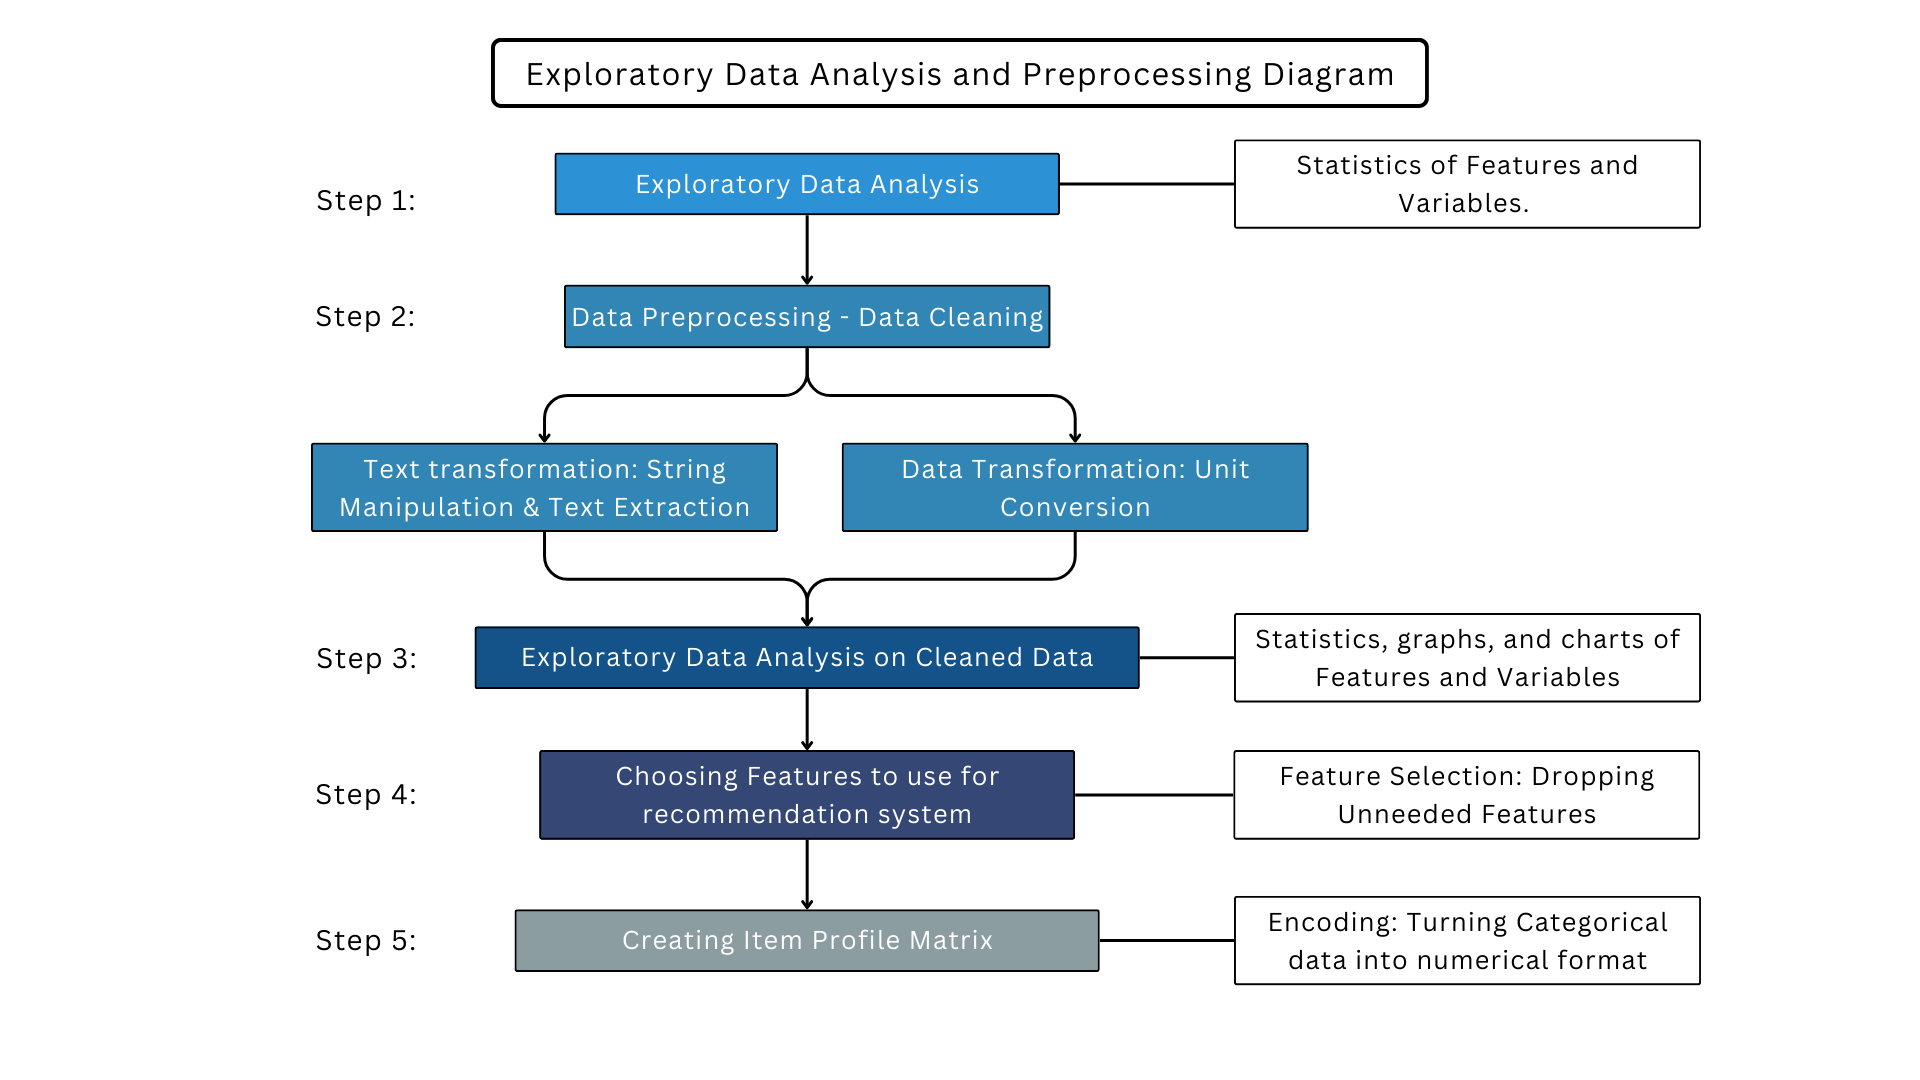

As shown in the diagram, we start off by exploring the dataset and data that we gathered by looking into the statistics, charting, and graphing some of the variables and features as our first step. With the data explored and insights gained on how to clean and process some of the data, we move on to the data pre-processing section, wherein the data is cleaned utilizing different pre-processing techniques such as text transformation, data transformation, feature selection, and encoding. Once we had cleaned the data, we run exploratory data analysis again in order to understand the cleaned data to help us prepare the dataset for modeling. After running EDA once more, in order to gain insight onto how we can use the data to create a recommendation system, we proceed with choosing the specific features. With specific features chosen from the cleaned dataset we are now able to create the item-profile matrix necessary for the recommendation system, and this is done using encoding, turning categorical data into numerical format in the form of binary/dummy values.

In [ ]:
# Loading the downloaded dataset with all of the job ids and features collected
import pandas as pd

all_job_info = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_info.csv')

### Step 1: Exploratory Data Analysis on The Raw Dataset

This first part of the exploratory data analysis centers on analyzing the aspects of the features to understand how they could be cleaned. Rather than provide patterns and distribution, this section aims to provide insight on how data preprocessing and cleaning can be done, as it is the step after this EDA.

This EDA centers on observing the values of the features, particulalry the unique values to observe whether they need cleaning

#### a. Running Statistics onto the whole dataset

In [ ]:
all_job_info.describe()

,Job Title,Salary,Requirements,Company,Location,Industry,Company Size,Education,Job Type,Posted Date,Job Link
count,4670,4670,4664,4670,4670,4670,4670,4670,4670,4670,4670
unique,875,259,3691,959,280,79,5,23,7,31,4670
top,DELIVERY DRIVER,Salary not specified,Qualifications/requirements not specified,"EXCEL PRO PLACEMENT & SERVICES, INC.","CITY OF MAKATI, NCR, FOURTH DISTRICT",WHOLESALE AND RETAIL TRADE,200 and over (Large),COLLEGE GRADUATE,Permanent,10 June 2024,https://philjobnet.gov.ph/job-vacancies/job/ma...
freq,128,2445,395,156,409,843,2703,2122,3356,569,1


Based on the results above, almost half of all job listings requires a college degree, and more than two-thirds of all listings are permanent positions.

Additionally, more than half of job listings are listed by large companies (=>200 employees), and around 8.76% of job listings are jobs set in Makati city, NCR. More than half of the job listings have decided not to publish salary information

None of the scraped job listings were duplicates. Additionally, there are 875 Unique job titles. It can also be observed that ther are 31 unique posted dates, which may indicate that PhilJobnet only holds job listings for a month. The unique values for this feature will be analyzed to confirm whether this is true


The number for industry is suspiciously high and will needed to be observed as to why that could be the case. Additionally, education, and salary will also be observed the same

#### b. Observing the Unique values of selected features

**Industry:** The first feature that is to be observed is Industry owing to its very high number of unqiue values. The unique values are obtained to observe why this is the case.

In [ ]:
# obtaining all the unique values of the industry feature

all_job_info['Industry'].unique()

array(['ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE; OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE ACTIVITIES',
       'FINANCIAL INTERMEDIATION', 'WHOLESALE AND RETAIL TRADE',
       'REAL ESTATE, RENTING AND BUSINESS ACTIVITIES',
       'OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE ACTIVITIES',
       'CONSTRUCTION', 'EDUCATION',
       'TRANSPORT, STORAGE AND COMMUNICATION',
       'MANUFACTURING; AGRICULTURE; WHOLESALE AND RETAIL TRADE; HOTELS AND RESTAURANTS',
       'ELECTRICITY, GAS AND WATER SUPPLY',
       'Company industry not specified', 'HOTELS AND RESTAURANTS',
       'AGRICULTURE; HOTELS AND RESTAURANTS; TRANSPORT, STORAGE AND COMMUNICATION; HEALTH AND SOCIAL WORK; OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE ACTIVITIES; FINANCIAL INTERMEDIATION',
       'MANUFACTURING', 'WHOLESALE AND RETAIL TRADE; MANUFACTURING',
       'AGRICULTURE', 'HEALTH AND SOCIAL WORK',
       'WHOLESALE AND RETAIL TRADE; CONSTRUCTION',
       

As observed above, the reason why there are 79 unique values in the industry feature is due to some job listings specifying two or more industries, wherein they all get lumped into one string. It is the results of industry combinations which inflated the unique values to 79. This will be cleaned in step 2: Data Preprocessing

**Education:** The second feature that is to be observed is education

In [ ]:
# obtaining all the unique values of the education feature

all_job_info['Education'].unique()

array(['Educ level not specified', 'HIGH SCHOOL GRADUATE',
       'VOCATIONAL GRADUATE', 'COLLEGE GRADUATE',
       '4TH YEAR HIGH SCHOOL/GRADE X (FOR K TO 12)',
       '1ST YEAR COLLEGE LEVEL', 'GRADE XI (FOR K TO 12)',
       '3RD YEAR COLLEGE LEVEL', 'VOCATIONAL UNDERGRADUATE',
       '2ND YEAR COLLEGE LEVEL', 'GRADE XII (FOR K TO 12)',
       '1ST YEAR HIGH SCHOOL/GRADE VII (FOR K TO 12)',
       '4TH YEAR COLLEGE LEVEL', 'ELEMENTARY GRADUATE', 'GRADE I',
       'GRADE II', 'GRADE VI',
       '2ND YEAR HIGH SCHOOL/GRADE VIII (FOR K TO 12)',
       'MASTERAL/POST GRADUATE',
       '3RD YEAR HIGH SCHOOL/GRADE IX (FOR K TO 12)',
       'MASTERAL/POST GRADUATE LEVEL', 'GRADE III',
       '5TH YEAR COLLEGE LEVEL'], dtype=object)

Observing the unique values of the education feature, and generally clean. No preprocessing is needed for the education feature

**Salary:** The third feature that is to be observed is salary to observe whether the unique values all had followed the same monthly salary format

In [ ]:
# obtaining all the unique values of the salary feature

all_job_info['Salary'].unique()

array(['₱675.00', 'Salary not specified', '₱539.00', '₱25,000.00',
       '₱14,000.00', '₱22,000.00', '₱610.00', '₱18,000.00', '₱15,000.00',
       '₱430.00', '₱13,500.00', '₱18,500.00', '₱500.00', '₱16,000.00',
       '₱649.00', '₱17,000.00', '₱12,000.00', '₱520.00', '₱579.00',
       '₱20,000.00', '₱40,000.00', '₱19,000.00', '₱30,000.00', '₱570.00',
       '₱50,000.00', '₱124,164.00', '₱226,416.71', '₱63,997.00',
       '₱80,003.00', '₱9,000.00', '₱395.00', '₱645.00', '₱35,000.00',
       '₱15,910.83', '₱650.00', '₱12,480.00', '₱479.00', '₱525.00',
       '₱760.00', '₱0.00', '₱24,000.00', '₱13,000.00', '₱28,000.00',
       '₱16,770.00', '₱12,900.00', '₱12,863.00', '₱13,497.00',
       '₱12,246.00', '₱468.00', '₱12,640.00', '₱12,500.00', '₱26,000.00',
       '₱2,878.00', '₱7,000.00', '₱6,000.00', '₱2,000.00', '₱14,500.00',
       '₱13,600.00', '₱800.00', '₱13,400.00', '₱17,899.00', '₱23,000.00',
       '₱600.00', '₱385.00', '₱18,408.00', '₱18,650.00', '₱27,000.00',
       '₱76,000.00'

As observed in the results, there are a lot of values that did not follow the monthly salary specification, particularly on the salary values that are in three digits which may indicate that those listed are daily salaries rather than monthly. Additionally, there are salary values that are only double digits. For the data preprocessing, the daily wages will be converted into monthly wages, and the wages with only double digits will be converted into salary not specified. This is because if it is in terms of daily wage, it would violate minimum wage laws. Additioanally most of the two-digit values are below 50, which would mean that even though the salary might be per hour, it would still be below minimum wage. These will be fixed in the data pre-processing portion

**Posted Date:** The fourth feature that is to be observed is the posted date to confirm whether Philjobnet only keeps job listings for a period of a month. The data was collected on July 3

In [ ]:
 all_job_info['Posted Date'].unique()

array(['3 July 2024', '2 July 2024', '1 July 2024', '30 June 2024',
       '29 June 2024', '28 June 2024', '27 June 2024', '26 June 2024',
       '25 June 2024', '24 June 2024', '23 June 2024', '22 June 2024',
       '21 June 2024', '20 June 2024', '19 June 2024', '18 June 2024',
       '17 June 2024', '16 June 2024', '15 June 2024', '8 June 2024',
       '14 June 2024', '13 June 2024', '12 June 2024', '11 June 2024',
       '10 June 2024', '9 June 2024', '7 June 2024', '6 June 2024',
       '5 June 2024', '4 June 2024', '3 June 2024'], dtype=object)

As observed in the result, it is confirmed that Philjobnet only keeps data on listings that are within a month of postings, as there are only data from July to June 3

**Step 1 Summary:** The results of the first EDA is that there are 2 features that needs cleaning, the industry feature to separate joined industries in single link to multiple industries in a list, and the salary feature to convert daily wages to monthly wages, and erroneous data into "not specified"

### Step 2: Data Preprocessing
With the features observed to see how they could be cleaned and processed.The following are all of the pre-processing techniques used in both step 2, and step 4 and 5, where data cleaning and pre-processing are done:

1. Text transformation - Text transformation was a needed pre-processing technique as there were some characteristics of strings that prevented us from analyzing the data and using them for modeling and analysis. Additionally, some features may be extracted from larger strings, where pieces of data and information are embedded. The following were the specific text transformations done:

  - String Manipulation - separating strings in order to obtain the list of industries rather than one whole string
  - String Manipulation - removing symbols that may prevent analysis, such as the peso symbol
  - Text-Extraction - Obtaining degree programs from requirements feature using regex

2. Data Transformation - Data transformation was a necessary pre-processing technique as there were inconsistencies in the measurement units across different data points. To ensure uniformity and accuracy in our analysis, the following transformations were applied:
  - Unit Conversion - Converting  daily wage to monthly wage

3. Feature Selection - To prepare the data for modeling, feature selection was necessary in order to place focus on a select group of features to be used to create the item-profile matrix
  - Dropping unneeded features and data
4. Encoding - Turning Categorical data into numerical format by creating dummy variables using encoding is necessary in order to create the item-profile matrix necessary for the recommendations system
  - Creating the Item-Profile matrix based on categorical features chosen

For this step, the feature for industry, salary are cleaned. While features are created from the requirements tab. Number 3 and 4 in the list above will be done in steps 4 and 5 after exploratory data analysis is conducted on the cleaned data



In [ ]:
# Loading Libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [ ]:
# Accessing the donwloaded data - csv file was uploaded to github for easy access

all_job_info = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_info.csv')

#### 1.A. Text transformation: String Manipulation - separating strings in order to obtain the list of industries rather than one whole string

As shown earlier in the EDA of the raw dataset, some of the

In [ ]:
# Creating function to split values with multiple industries in a single string, to a list of industries

def split_industries(industry_str):
    # Check if the string is "Company industry not specified"
    if industry_str == 'Company industry not specified':
        return []  # Or any other placeholder you want to use
    # Split by ';' and strip extra spaces
    return [industry.strip() for industry in industry_str.split(';')]

# Apply the function to the 'Industry' column
all_job_info['Industry'] = all_job_info['Industry'].apply(split_industries)

In [ ]:
# Checking all unique industries

all_industries = set(industry for sublist in all_job_info['Industry'] for industry in sublist)
all_industries

{'ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE',
 'AGRICULTURE',
 'CONSTRUCTION',
 'EDUCATION',
 'ELECTRICITY, GAS AND WATER SUPPLY',
 'EXTRA-TERRITORIAL ORGANIZATIONS AND BODIES',
 'FINANCIAL INTERMEDIATION',
 'HEALTH AND SOCIAL WORK',
 'HOTELS AND RESTAURANTS',
 'MANUFACTURING',
 'MINING AND QUARRYING',
 'OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE ACTIVITIES',
 'PUBLIC ADMINISTRATION AND DEFENSE',
 'REAL ESTATE, RENTING AND BUSINESS ACTIVITIES',
 'TRANSPORT, STORAGE AND COMMUNICATION',
 'WHOLESALE AND RETAIL TRADE'}

With listings with multiple industries cleaned to separate a single string into a list of multiple industries, it can be observed that the number of unique industries fell. From 79 to 16 unique individual industries

#### 1.B. Text transformation: String Manipulation - removing symbols that may prevent analysis, such as the peso symbol
The salary feature contains the pero symbol which makes the salary feature a string instead of a numerical value. To clean this, the peso symbol is removed, and the data is converted into a float. To handle the values where the salary is not specified as indicated in a string, will all be converted to null values.

Additionally it was also indentified that some of the salaries were in the ten millions, and in the millions, which may indicate that there was an error with inputting the decimals (ie. the centavos values)

In [ ]:
# Confirming that salary column is an object/strings

all_job_info['Salary'].head()

,Salary
0,₱675.00
1,₱675.00
2,₱675.00
3,Salary not specified
4,₱539.00


In [ ]:
import numpy as np

# Removing 'Salary not specified' and replace with NaN
all_job_info['Salary'] = all_job_info['Salary'].replace('Salary not specified', np.nan)

# Removing the currency symbol and commas
all_job_info['Salary'] = all_job_info['Salary'].str.replace('₱', '').str.replace(',', '')

# Converting the cleaned string to float
all_job_info['Salary'] = pd.to_numeric(all_job_info['Salary'], errors='coerce')

# Function to adjust salary values in millions
def adjust_salary(salary):
    if pd.isna(salary):
        return salary
    if salary >= 1_000_000:
        return round(salary / 100, 2)  # Convert millions to ten thousands
    return salary

# Apply the adjustment function
all_job_info['Salary'] = all_job_info['Salary'].apply(adjust_salary)

The data now has the peso symbol removed, and has now been converted into a float, and the 'salary not specified' are converted into null values.

In [ ]:
all_job_info['Salary'].head()

,Salary
0,675.0
1,675.0
2,675.0
3,NaN
4,539.0


#### 1.C. Text transformation: Text-Extraction - Obtaining degree programs from requirements feature using regex

With most of the education requirements highlighted in the EDA has stated that most of the jobs require a a higher level of education, a feature can be created wherein the degree program can be obtained from the requirements features. This was done through the use of regex, as well as the use of matching the list of degree programs identified to the strings that regex has identified.

In [ ]:
import re
import unicodedata
import pandas as pd

In [ ]:
all_job_info['Requirements'] = all_job_info['Requirements'].apply(lambda x: x if isinstance(x, str) else '')

# Function to extract degree programs from the requirements
def extract_degree_programs(requirements):
    # Define a regex pattern to match degree programs
    pattern = r'\b(Bachelor\'s|BS|Graduate|College|Diploma)\s?(in|of)?\s?([A-Za-z\s]+)?'
    matches = re.findall(pattern, requirements, re.IGNORECASE)
    # Extract the degree names from the matches and clean them
    degree_programs = []
    for match in matches:
        degree_name = ' '.join([part for part in match if part]).strip()
        if degree_name:
            degree_programs.append(degree_name)
    return degree_programs

# Apply the function to the Requirements column
all_job_info['Degree Programs'] = all_job_info['Requirements'].apply(extract_degree_programs)

program = []
def extract_degree(text):
    # Regex pattern to find degree programs
    pattern = r'Bachelor\'s Degree in ([\w\s]+)|Graduate of ([\w\s]+)|BS ([\w\s]+)'
    matches = re.findall(pattern, ' '.join(text))
    if matches:
        for match in matches:
            for group in match:
                if group:
                    return group.strip()  # Return the first match found

# Extract degree programs from each entry in data
for entry in all_job_info['Degree Programs']:
    degree_program = extract_degree(entry)
    if degree_program:
        program.append(degree_program)


In [ ]:
all_job_info['Degree Programs'] = all_job_info['Degree Programs'].apply(lambda x: ', '.join(x))

degree_programs = [
    "Accountancy",'Engineering', 'Logistics',"Nursing", "Information Technology", 'Marketing',
    "Chemistry", "Accounting", "Mechanical Engineering",
    "Electronics", "Computer Science", "Psychology", "Food Technology",
    "Electrical Engineering", 'Industrial Relations',"Civil Engineering","Architecture",
    "Electronics and Communications Engineering", "Industrial Engineering",
    "Human Resource Management", "Marketing Management", "Economics",
    "Financial Management", "Mathematics", "Statistics", "Biology",
    "Environmental Science", "Fisheries", "Tourism Management",'Medical', "Hotel and Restaurant Management", 'IT',
    "Medical Technology", "Occupational Therapy", "Radiologic Technology", "Pharmacy",
    "Nutrition", "Sociology", "Political Science", "Interior Design",
    "Building Technology Management", "Business Administration",
    "Accounting Technology", "Management Accounting", 'Food Tech',"Financial Accounting",
    "Accounting Information System", "Business Studies", "Business Management",
    "Industrial Technology", "Computer Engineering",
    "Information Technology", 'Art', 'Human Resources','English', 'Radiologic Technology',
    "Environmental Engineering", "Agricultural Engineering", "Chemical Engineering",
    "Agricultural Science", "Animal Science", "Multimedia Arts",
    "Architecture", "Pharmacy",'Agriculture',
    "Chemical Engineering", "Biomedical Engineering", 'Mechanical Technology',
    "Veterinary Medicine", "Legal Management", "Economics",
    "Supply Chain Management", "Mathematics", "Biotechnology",
    "Physics", "Fine Arts", "Literature", "International Studies",
    "Customs Administration", "Culinary",'Business',"Entrepreneurship", "Business Economics", 'Food Science','Finance',"Materials Engineering", 'Management', 'Computer','Commerce'
]

def match_degree_programs_in_sentence(sentence):
    matched_programs = []
    sentence_lower = sentence.lower()  # Convert sentence to lowercase for case-insensitive matching

    for program in degree_programs:
        program_lower = program.lower()  # Convert program to lowercase for case-insensitive matching

        # Create a regex pattern to match whole words only
        pattern = r'\b' + re.escape(program_lower) + r'\b'

        # Check if the program appears as a whole word in the sentence
        if re.search(pattern, sentence_lower):
            matched_programs.append(program)

    if not matched_programs:
        matched_programs.append("Any Degree Program")

    return matched_programs

# Applying the function to the list of sentences
all_job_info['Matched Programs'] = all_job_info['Degree Programs'].apply(match_degree_programs_in_sentence)


#### 2.A. Data Transformation: Unit Conversion - Converting  daily wage to monthly wage

To convert daily wage into monthly wage, an assumption has to be made that there are 20 working days in a month. Additionally, 2 digit data are turned into null as the specifications are not aligned

In [ ]:
monthly_salary = []

# Process each salary entry
for each in all_job_info['Salary']:
    if pd.isna(each):
        # Append NaN if the value is already NaN
        monthly_salary.append(np.nan)
    elif each < 100:
        # Replace with NaN if less than 5000, as it may indicate that it is in terms of daily wage and not monthly wage
        monthly_salary.append(np.nan)
    elif 100 <= each <= 5000:
        # Multiply by 20 if within the range
        multiplied_value = each * 20
        monthly_salary.append(multiplied_value)
    else:
        # Leave unchanged if greater than 1000
        monthly_salary.append(each)

# Update DataFrame with the processed salaries
all_job_info['Salary'] = monthly_salary


In [ ]:
all_job_info['Salary'].head()

,Salary
0,13500.0
1,13500.0
2,13500.0
3,NaN
4,10780.0


The values that were in daily wages before are now converted into mothly wages

#### Creating a Unique Job Id per job listing

In [ ]:
all_job_info['Job ID'] = range(1, len(all_job_info) + 1)
all_job_info = all_job_info.drop('Degree Programs', axis=1)
new_column_order = ['Job ID'] + [col for col in all_job_info.columns if col != 'Job ID']
all_job_info = all_job_info[new_column_order]
all_job_info

,Job ID,Job Title,Salary,Requirements,Company,Location,Industry,Company Size,Education,Job Type,Posted Date,Job Link,Matched Programs
0,1,MASON (GENERAL),13500.0,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,200 and over (Large),Educ level not specified,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/ma...,[Any Degree Program]
1,2,PLUMBER,13500.0,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,200 and over (Large),HIGH SCHOOL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/pl...,[Any Degree Program]
2,3,BUILDING ELECTRICIAN,13500.0,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,200 and over (Large),VOCATIONAL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/bu...,[Any Degree Program]
3,4,DEBT COLLECTOR,NaN,- At least High School Graduate- With means of...,"HC CONSUMER FINANCE PHILS., INC.","CITY OF BAYAWAN (TULONG), NEGROS ORIENTAL",[FINANCIAL INTERMEDIATION],200 and over (Large),HIGH SCHOOL GRADUATE,Permanent,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/de...,[Any Degree Program]
4,5,JANITOR,10780.0,Qualifications/requirements not specified,RYDER & SPARKS PRIME CORPORATION,"CITY OF CALAMBA, LAGUNA",[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,200 and over (Large),HIGH SCHOOL GRADUATE,Project-based,3 July 2024,https://philjobnet.gov.ph/job-vacancies/job/ja...,[Any Degree Program]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,4666,SECOND MARINE ENGINEER,NaN,AT LEAST OIC-EW AND MDM-2 LICENSE HOLDER;MUST ...,PRIMARY TRIDENT MARINE SOLUTIONS INC.,"MANDAUE CITY, CEBU","[TRANSPORT, STORAGE AND COMMUNICATION]",100 - 199 (Medium),Educ level not specified,Contractual,10 June 2024,https://philjobnet.gov.ph/job-vacancies/job/se...,[Any Degree Program]
4666,4667,CHIEF ENGINEER,NaN,AT LEAST MDM-2 AND OIC-EW LICENSE HOLDER;MUST ...,PRIMARY TRIDENT MARINE SOLUTIONS INC.,"MANDAUE CITY, CEBU","[TRANSPORT, STORAGE AND COMMUNICATION]",100 - 199 (Medium),Educ level not specified,Contractual,10 June 2024,https://philjobnet.gov.ph/job-vacancies/job/ch...,[Any Degree Program]
4667,4668,LAUNDRY WORKER,NaN,"-1 year & above work experiencedHotel, Commisa...","UNITED PHILIPPINE LINES, INC.",UNITED STATES OF AMERICA,[HOTELS AND RESTAURANTS],100 - 199 (Medium),Educ level not specified,Contractual,7 June 2024,https://philjobnet.gov.ph/job-vacancies/job/la...,[Any Degree Program]
4668,4669,CHEF D'PARTIE GARDEMANGER,NaN,"-1 year & above work experienced-Hotel, Fine D...","UNITED PHILIPPINE LINES, INC.",UNITED STATES OF AMERICA,[HOTELS AND RESTAURANTS],100 - 199 (Medium),VOCATIONAL GRADUATE,Contractual,7 June 2024,https://philjobnet.gov.ph/job-vacancies/job/ch...,[Any Degree Program]


Shown above is the cleaned dataset with the features cleaned above are incorporated onto

In [ ]:
# Duplicating all_job_info dataset to all_job_details
all_job_details = all_job_info

In [ ]:
# Downloading all_job_info dataset

from google.colab import files

all_job_details.to_csv('all_job_details.csv', index=False)
# Download the CSV file
files.download('all_job_details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Step 3: Exploratory Data Analysis on Cleaned Dataset
Going Back to the Diagram:

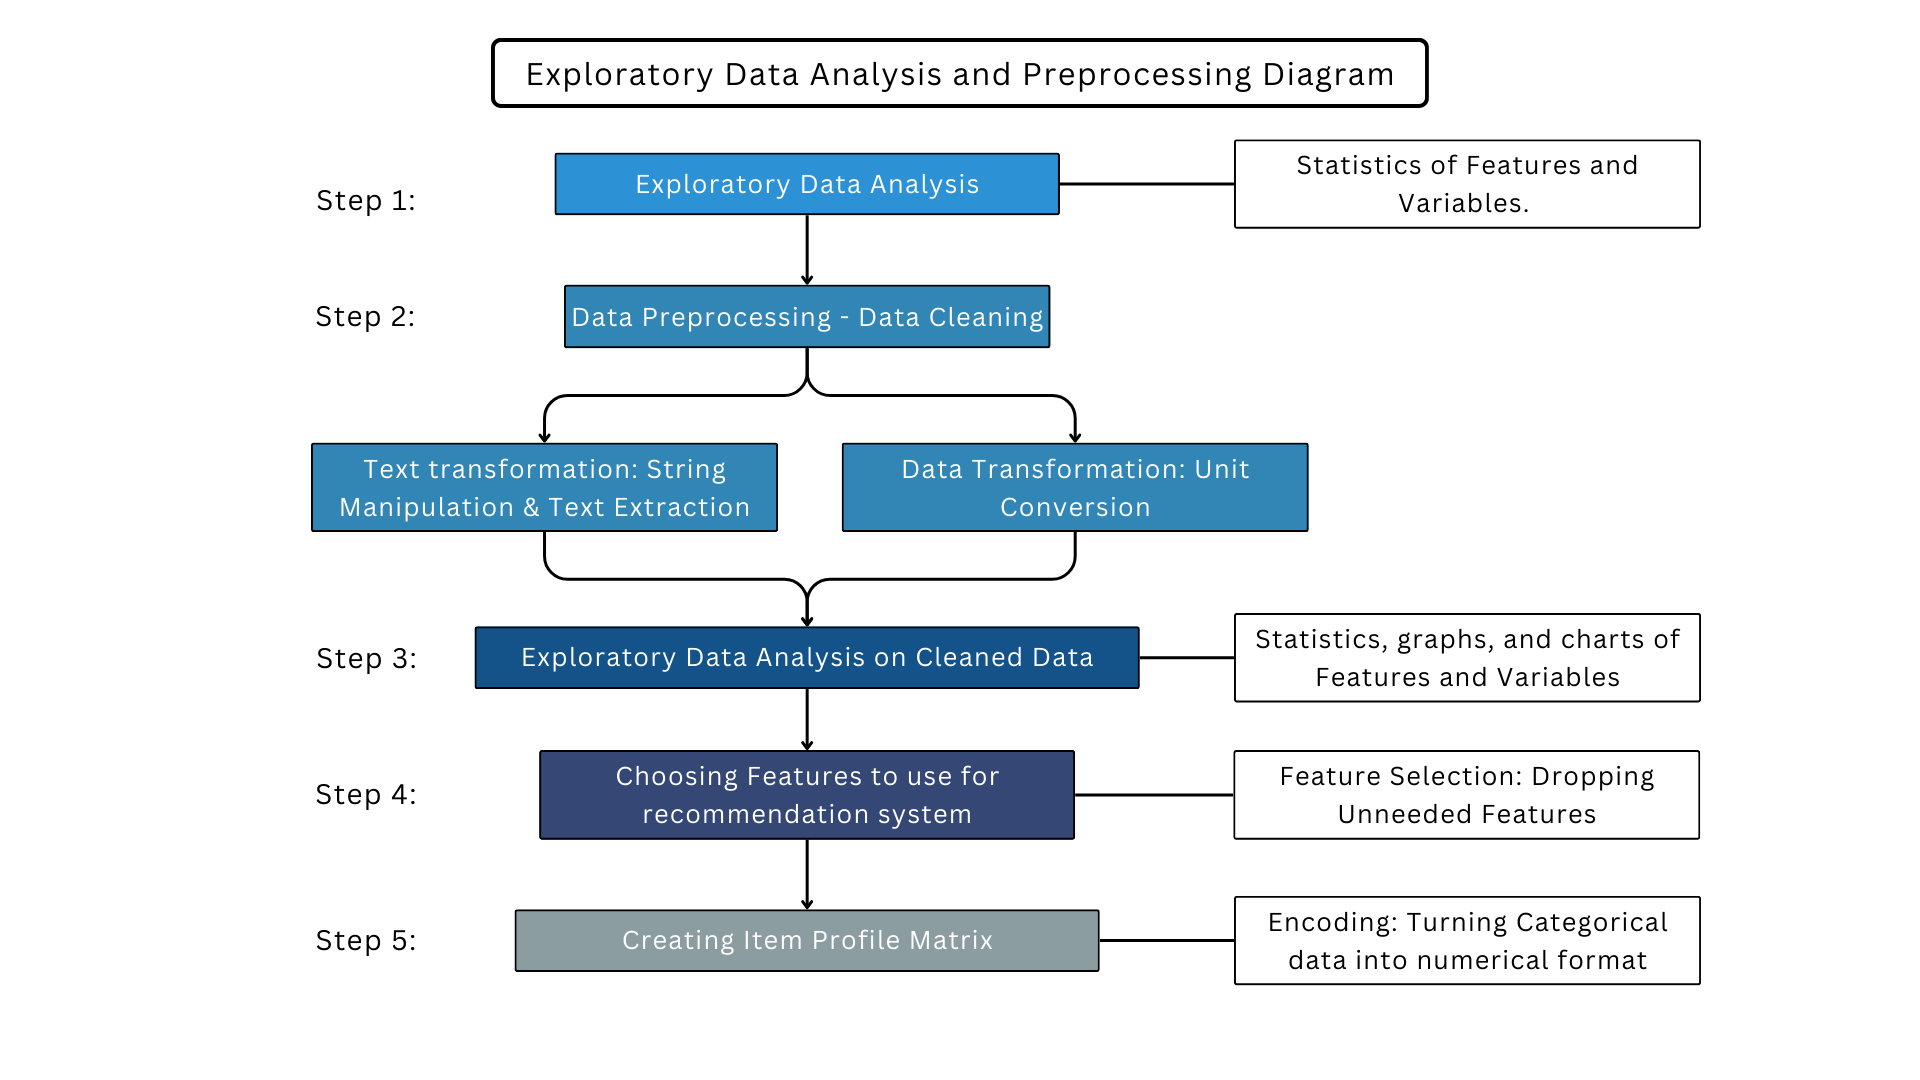

The steps for initial EDA on raw dataset is complete, along with the the text transformations and data transformations for cleaning and creating features in step 2. With the cleaned dataset, step 3 focuses on gathering insights on the cleaned values so that we would be guided in choosing the features for the recommendation system.

This part 2 of the EDA entails providing statistics, graphs, and charts of the features cleaned previously.

#### a. EDA on Salary Data
With the salary data cleaned, EDA is conducted to provide insight onto the distribution of salaries across the job listings. Statistics will be obtained, while a histogram to visualize the distribution are also done. However with null values in the data, the analysis may not provide the most in depth of analysis

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

all_job_info['Salary'].describe()

,Salary
count,2140.00
mean,21636.91
std,16151.35
min,6000.00
25%,12200.00
50%,16000.00
75%,25000.00
max,226416.71


As can be observed in the results, there are only 2140 job listings that have salary data, which is less than half of the dataset.

The mean salary in the the job lisitngs with salaries are 21,639.91, while the median is at 16,000.  With the minimum at 6,000 and the max as high as 226416.71. There is also a lot of deviations with wages as observed in the result

To show the distribution of the salaries, below is a histogram

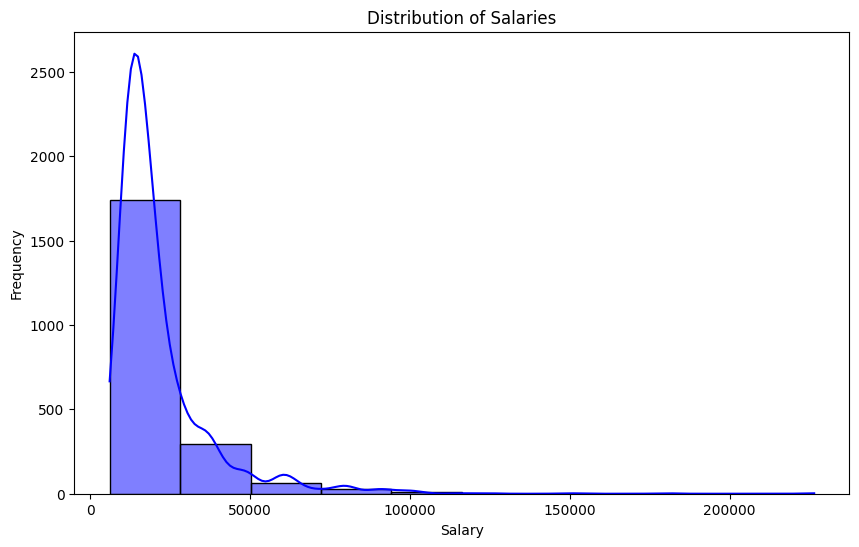

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'Salary' column
plt.figure(figsize=(10, 6))
sns.histplot(all_job_info['Salary'], bins=10, kde=True, color='blue')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')

# Show the plot
plt.show()

The histogram highlights that there are many low salaries clustered on the left of the histogram, with a few high salaries stretching out to the right.he few high salaries pull the average up, making it seem higher than most individual salaries. This is why you might have a right-skewed histogram showing that the majority of salaries are lower, while a small number of high salaries create a long tail to the right. The majority of job listings provide salaries on the lower end of the scale. This means that most people in your dataset earn salaries that are relatively close to each other but low compared to the highest salaries.

#### b. EDA on Cleaned Industry Data

With the cleaned industry feature, EDA is conducted similarly to the salary feature but considering it is a categorical type of data, counts and ratios are obtained instead, to provide insight on the types of industries that job listings generally are on. Additionally, some job listing have multiple industries as stated previoulsy in the EDA, and will be included for the industries that the job listing falls onto

In [ ]:
import seaborn as sns

industries_flat = [industry for sublist in all_job_info['Industry'] for industry in sublist]

# Create a DataFrame to count occurrences of each industry
industry_counts = pd.Series(industries_flat).value_counts().reset_index()
industry_counts.columns = ['Industry', 'Number of Job Listings']

# Calculate the total number of job listings
total_listings = len(all_job_info)

# Calculate the ratio of each industry to the total number of listings
industry_counts['Ratio to total job listings'] = industry_counts['Number of Job Listings'] / total_listings

# Display the DataFrame with counts and ratios
industry_counts

,Industry,Number of Job Listings,Ratio to total job listings
0,WHOLESALE AND RETAIL TRADE,1013,0.22
1,"OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE A...",869,0.19
2,MANUFACTURING,561,0.12
3,FINANCIAL INTERMEDIATION,512,0.11
4,HEALTH AND SOCIAL WORK,450,0.10
5,"REAL ESTATE, RENTING AND BUSINESS ACTIVITIES",366,0.08
6,ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS ...,356,0.08
7,"TRANSPORT, STORAGE AND COMMUNICATION",354,0.08
8,CONSTRUCTION,332,0.07
9,HOTELS AND RESTAURANTS,274,0.06


<ipython-input-61-a8924fb03369>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Job Listings', y='Industry', data=industry_counts, palette='viridis')


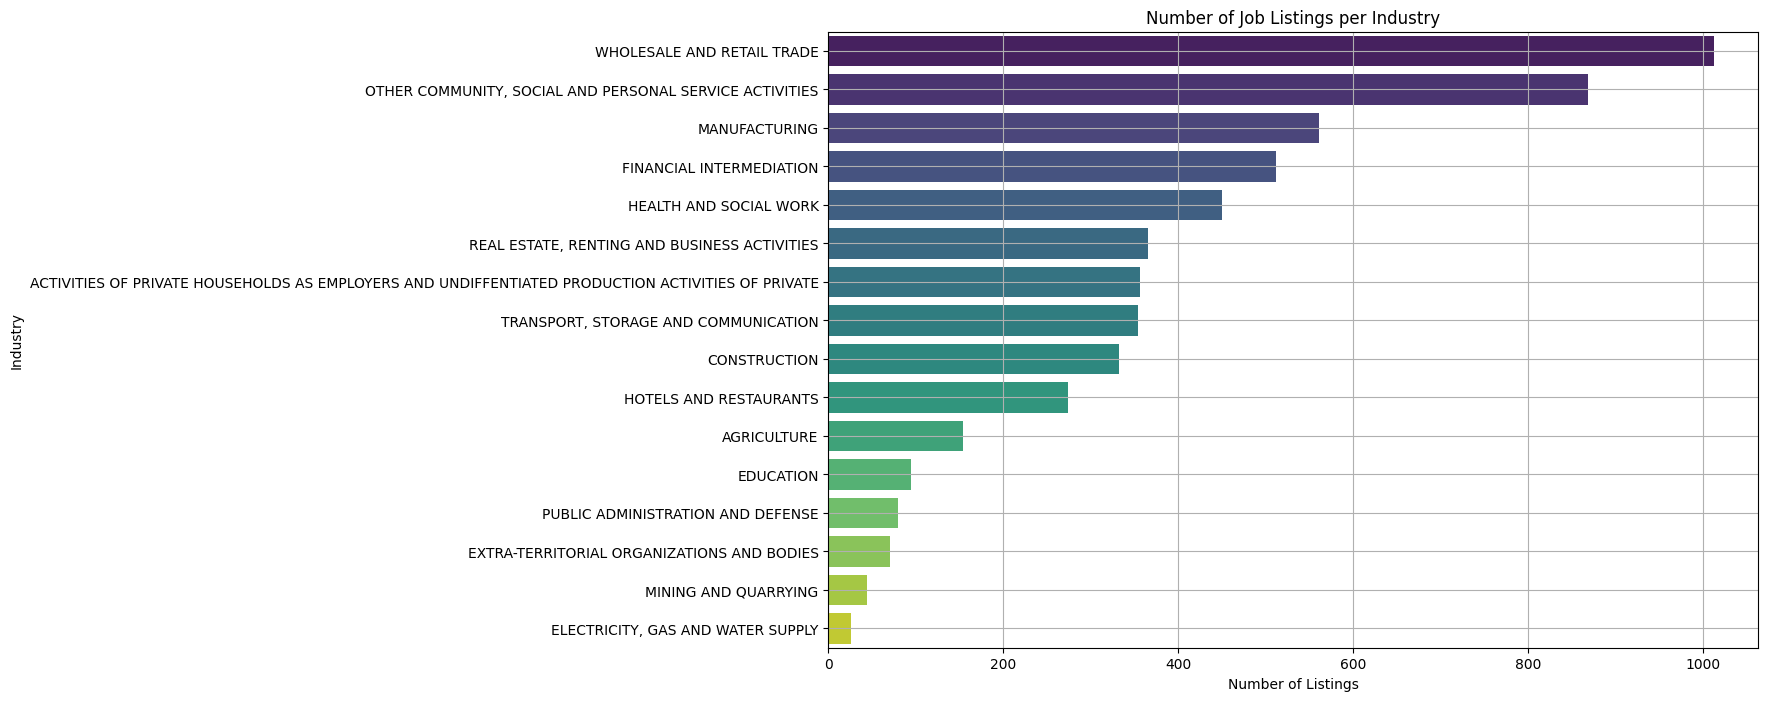

In [ ]:
# Plotting the bar graph for the industries of the job listings
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Job Listings', y='Industry', data=industry_counts, palette='viridis')
plt.title('Number of Job Listings per Industry')
plt.xlabel('Number of Listings')
plt.ylabel('Industry')
plt.grid(True)
plt.show()

The statistics and bar graph show above that the most common industry in the dataset are wholesale and retail trade type of jobs with 1013 job listings representing 22% of the dataset. This is followed by OTHER COMMUNITY, SOCIAL AND PERSONAL SERVICE with 869 job lisitngs, comprising of 19% of the dataset.

On the other side of the results, the least amoung of job listings are ELECTRICITY, GAS AND WATER SUPPLY, with only 26 job listings less than 1%, the second lowest is MINING AND QUARRYING	with 44 job listings less than 1% as well. These results highlight that there are job types with more openings than others

#### C. Running EDA on Education Level Feature
As highlighted in the inital EDA on the raw data, education did not need to be clean as the format of the values were already all unique. EDA is conducted on this feature to provide insight into the required education level of the job listings

In [ ]:
# Counting the job listings of each categorical educational level requirement

education_counts = all_job_info['Education'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Number of Job Listings']

# Calculate the total number of job listings to create ratio
total_listings = len(all_job_info)

# Calculate the ratio of each education level to the total number of listings
education_counts['Ratio to Total Job Listings'] = education_counts['Number of Job Listings'] / total_listings
education_counts

,Education Level,Number of Job Listings,Ratio to Total Job Listings
0,COLLEGE GRADUATE,2122,0.45
1,Educ level not specified,1099,0.24
2,HIGH SCHOOL GRADUATE,598,0.13
3,VOCATIONAL GRADUATE,196,0.04
4,4TH YEAR HIGH SCHOOL/GRADE X (FOR K TO 12),173,0.04
5,2ND YEAR COLLEGE LEVEL,97,0.02
6,GRADE XII (FOR K TO 12),93,0.02
7,1ST YEAR COLLEGE LEVEL,83,0.02
8,MASTERAL/POST GRADUATE,44,0.01
9,2ND YEAR HIGH SCHOOL/GRADE VIII (FOR K TO 12),33,0.01


<ipython-input-185-65dcbe64ac4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Job Listings', y='Education Level', data=top_5_education_counts, palette='viridis')


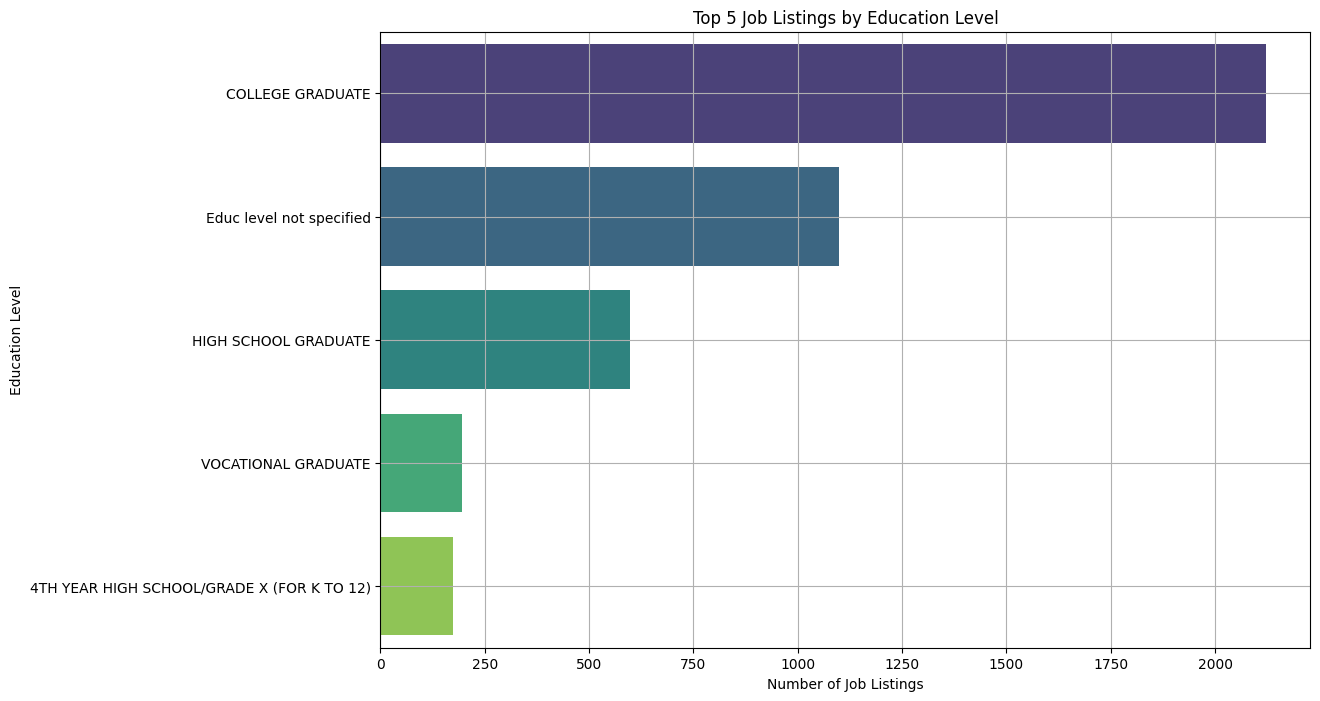

In [ ]:
# Get the top 5 education levels
top_5_education_counts = education_counts.head(5)

# Plotting the bar graph for top 5 education levels
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Job Listings', y='Education Level', data=top_5_education_counts, palette='viridis')
plt.title('Top 5 Job Listings by Education Level')
plt.xlabel('Number of Job Listings')
plt.ylabel('Education Level')
plt.grid(True)
plt.show()

With the results above, almost half of all of the job listings require a college degree with 2122 job listings. This is followed by job listings that did not specify an education level with 24% of the data or around 1099 of the job listings.

Job listings that are below Highschool level were generally observed to have very scarce number of job listings where a large majority require at least high school level and higher.

 There were also some education levels that were specific such as Grade 3 level, or Grade 1 which had very few job listings requiring them

#### D. EDA on Cleaned Degree Program Data

With the feature of degree program obtained from the requirements feature, EDA is conducted similarly to the industry feature as it is also a categorical type of data. As highlighted in the EDA conducted on education level above and prior, college graduate was the most common among Job listings. With the degree program obtained from the job listings that required colle degree program EDA is conducted by obtaining the Counts and ratios are obtained, to provide insight on the types of degree programs that job listings generally require. Additionally, some job listing have multiple degree programs as stated previoulsy in the EDA, and will be included for the degree programs that the job listing falls onto

In [ ]:
# Only look at college graduate data

college_data = all_job_info[all_job_info['Education'] == 'COLLEGE GRADUATE']

degree_flat = [degree for sublist in college_data['Matched Programs'] for degree in sublist]

# Create a DataFrame to count occurrences of each degree program
degree_counts = pd.Series(degree_flat).value_counts().reset_index()
degree_counts.columns = ['Degree Program', 'Number of Job Listings']

# Calculate the total number of job listings
total_listings = len(college_data)

# Calculate the ratio of each industry to the total number of listings
degree_counts['Ratio to total job listings'] = degree_counts['Number of Job Listings'] / total_listings

# Display the DataFrame with counts and ratios
degree_counts

,Degree Program,Number of Job Listings,Ratio to total job listings
0,Any Degree Program,1462,0.69
1,Business,189,0.09
2,Accountancy,79,0.04
3,Management,76,0.04
4,Engineering,74,0.03
...,...,...,...
65,Accounting Information System,1,0.00
66,Customs Administration,1,0.00
67,Mechanical Technology,1,0.00
68,Building Technology Management,1,0.00


<ipython-input-177-d0a6d8e5efd1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Job Listings', y='Degree Program', data=top_10_degrees, palette='viridis')


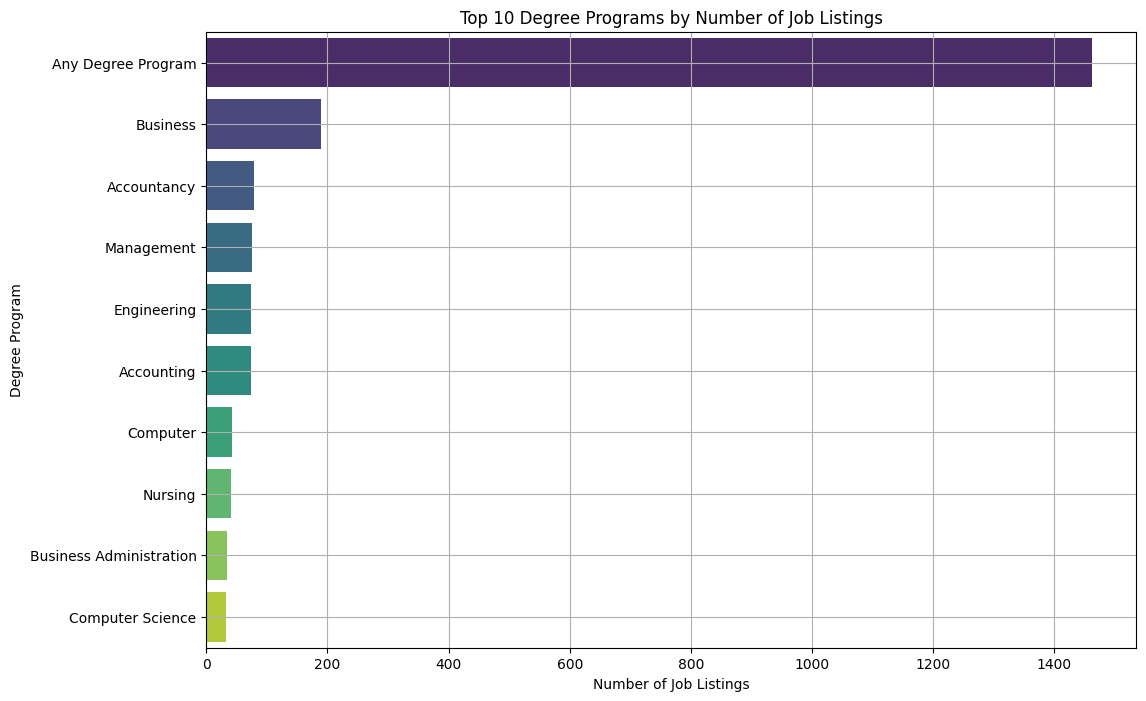

In [ ]:
# Graphing the top 10 degree programs
degree_counts_sorted = degree_counts.sort_values(by='Number of Job Listings', ascending=False)
top_10_degrees = degree_counts_sorted.head(10)

# Plotting the bar graph for the top 10 degree programs
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Job Listings', y='Degree Program', data=top_10_degrees, palette='viridis')
plt.title('Top 10 Degree Programs by Number of Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Degree Program')
plt.grid(True)
plt.show()

As seen in the results of the statistics and bar graphs above most of the job listings that require a college degree did not specify what kind of college degree is required for the job with 1462 job listings or 62% of the college degree-required jobs stating that any degree program is sufficient as long as the person applying is a college graduate.

In terms of job listings with specified degree programs Business was the most common with over 9% of the job listings, 189 specifically, requiring a college degree. This is followed by Accountancy, and Management.

There were also a lot of job listings that required degree programs that only the job listing itsef required. This moslty consisted of degree programs that are highly specialized and specific such as 	Building Technology Management, and Customs Administration, among others

#### E. Running EDA on Job type.
Similarly to the education feature earlier, there was no cleaning done on the job type feature, as it was already clean with only 5 unique values. Job type refers to the type of working arrangement, such as full time, part time, among others. EDA is conducted to observe which job type are most common among the job listings.



In [ ]:
# Counting the job listings of each categorical educational level requirement

type_counts = all_job_info['Job Type'].value_counts().reset_index()
type_counts.columns = ['Job Type', 'Number of Job Listings']

# Calculate the total number of job listings to create ratio
total_listings = len(all_job_info)

# Calculate the ratio of each education level to the total number of listings
type_counts['Ratio to Total Job Listings'] = type_counts['Number of Job Listings'] / total_listings
type_counts

,Job Type,Number of Job Listings,Ratio to Total Job Listings
0,Permanent,3356,0.72
1,Job type not specified,520,0.11
2,Contractual,510,0.11
3,Project-based,192,0.04
4,Work from home/online job,41,0.01
5,Internship/OJT,26,0.01
6,Part-time,25,0.01


<ipython-input-191-61eee335d92d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Job Listings', y='Job Type', data=type_counts, palette='viridis')


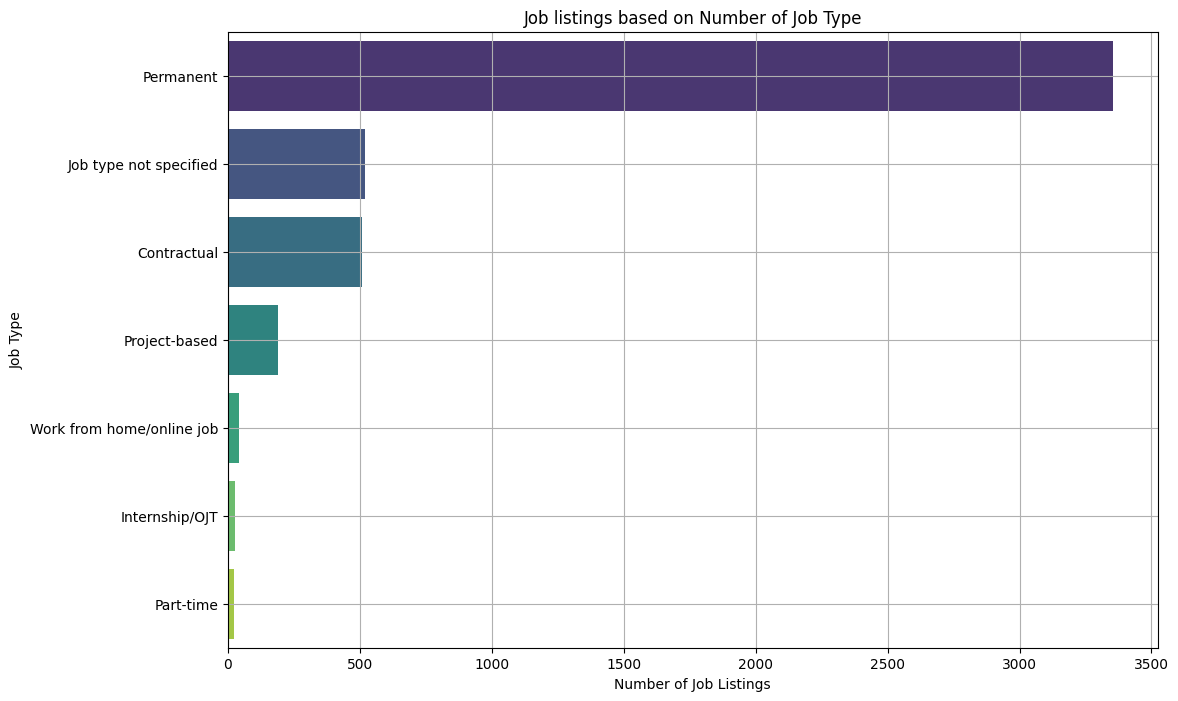

In [ ]:
# Graphing the job types
# Plotting the bar graph for the top 10 degree programs
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Job Listings', y='Job Type', data=type_counts, palette='viridis')
plt.title('Job listings based on Number of Job Type')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Type')
plt.grid(True)
plt.show()

With the results above, most of the Job listings are permamanent with over 72% of all of the job listings stating that the job is permanent. However, there were also quite a few job listings that stated that the job type remains unspecified with 11 % of the total job listings.

Regardless, it can be stated that most of the job listings are permanent positions.

### Step 4: Choosing Features to use for recommendation system
With the EDA conducted on the cleaned dataset, we now proceed with preparing the dataset for modeling to create the recommendation system. The first step of doing so is selecting the features to be used and serve as the basis for the features utilized for the item-profile matrix.

With the results above, we have decided to choose features that were categorical as they contain the characteristics of the job listings, and will be the basis for the profile of each job listing. These characteristics will be the basis of how the recommendation systems are run, and with the user database to be introduced later on, these characteristics and categorical values represent the characteristics of the jobs chosen by the users.
 the following were chosen:

1. Industry  - The Industry/ies of the job listings
2. Education - The Educational Level Attained
3. Job Type
4. Degree Program - If applicable to job listings

This means that there are 4 features that the recommendation system will be basing off on.

Additionally, Job ID will be included


In [ ]:
# Choosig the features

features_for_matrix = all_job_details[['Job ID', 'Industry', 'Education', 'Job Type', 'Matched Programs']]

In [ ]:
features_for_matrix

,Job ID,Industry,Education,Job Type,Matched Programs
0,1,[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,Educ level not specified,Project-based,[Any Degree Program]
1,2,[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,HIGH SCHOOL GRADUATE,Project-based,[Any Degree Program]
2,3,[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,VOCATIONAL GRADUATE,Project-based,[Any Degree Program]
3,4,[FINANCIAL INTERMEDIATION],HIGH SCHOOL GRADUATE,Permanent,[Any Degree Program]
4,5,[ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS...,HIGH SCHOOL GRADUATE,Project-based,[Any Degree Program]
...,...,...,...,...,...
4665,4666,"[TRANSPORT, STORAGE AND COMMUNICATION]",Educ level not specified,Contractual,[Any Degree Program]
4666,4667,"[TRANSPORT, STORAGE AND COMMUNICATION]",Educ level not specified,Contractual,[Any Degree Program]
4667,4668,[HOTELS AND RESTAURANTS],Educ level not specified,Contractual,[Any Degree Program]
4668,4669,[HOTELS AND RESTAURANTS],VOCATIONAL GRADUATE,Contractual,[Any Degree Program]


#### Step 5: Creating Item Profile Matrix - Encoding: Turning Categorical data into numerical format

Creating the item-profile matrix for the jobs based on Industry, Education, Job Type, and Matched programs. The matrix entails that the characteristics be converted into a binary value, where if the job list fits the characteristic contained in each of the features it would have a value of 1, 0 if otherwise

To create the item-profile matrix, we will use the MultiLabelBinazer code is used obtained from sklearn.preprocessing library (Ravihara, 2023). This is because this library is able to create binary/dummy variables even the feature is a list without the need for a for-loop.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Process 'Industry' column (one-hot encode)
mlb_industry = MultiLabelBinarizer()
df_industry = pd.DataFrame(mlb_industry.fit_transform(features_for_matrix['Industry']), columns=mlb_industry.classes_, index=features_for_matrix.index)

# Process the 'Education' column (one-hot encode)
features_for_matrix['Education'] = features_for_matrix['Education'].astype(str).str.strip().str.upper()
df_education = pd.get_dummies(features_for_matrix['Education'])

# Process the 'Job Type' column (one-hot encode)
df_job_type = pd.get_dummies(features_for_matrix['Job Type'])

# Process the 'Matched Programs' column
mlb_programs = MultiLabelBinarizer()
df_matched_programs = pd.DataFrame(mlb_programs.fit_transform(features_for_matrix['Matched Programs']), columns=mlb_programs.classes_, index=features_for_matrix.index)

# Create Job ID column starting from 1
features_for_matrix['Job ID'] = range(1, len(features_for_matrix) + 1)

df_education = df_education.astype(int)
df_job_type = df_job_type.astype(int)

# Combine the encoded columns
item_profile_matrix = pd.concat([features_for_matrix['Job ID'], df_industry, df_education, df_job_type, df_matched_programs], axis=1)


<ipython-input-197-2d1fbb52f2f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_matrix['Education'] = features_for_matrix['Education'].astype(str).str.strip().str.upper()
<ipython-input-197-2d1fbb52f2f8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_matrix['Job ID'] = range(1, len(features_for_matrix) + 1)


In [ ]:
item_profile_matrix

,Job ID,ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE,AGRICULTURE,CONSTRUCTION,EDUCATION,"ELECTRICITY, GAS AND WATER SUPPLY",EXTRA-TERRITORIAL ORGANIZATIONS AND BODIES,FINANCIAL INTERMEDIATION,HEALTH AND SOCIAL WORK,HOTELS AND RESTAURANTS,...,Nutrition,Occupational Therapy,Pharmacy,Political Science,Psychology,Radiologic Technology,Sociology,Statistics,Supply Chain Management,Tourism Management
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,4666,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4666,4667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4667,4668,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4668,4669,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Shown above is the result of the encoding of the categorical variables into numerical variables to create the item-profile matrix. There are around 120 columns as each colum represents the characteristics within each of the unique values in the four features selected.

In [ ]:
# Downloading Item profile matrix to save - uploading result to github for easy access

from google.colab import files

item_profile_matrix.to_csv('item_profile_matrix.csv', index=False)
# Download the CSV file
files.download('item_profile_matrix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## VI. Collecting User Data - Creating a User Database

With the data from Philjobnet collected, cleaned, and transformed into an item-profile matrix, the next step is to gather a dataset on users or students. This student data is crucial because the recommendations are tailored to their preferences based on their selected jobs from the dataset.

The personalized job recommender system utilizes this dataset and the item profile matrix created. To collect user data for the recommendation system, a survey was administered to current university students to gather user data. Participants were presented with a list of job titles encompassing various details, including salary, description, company, location, education requirements, job type, industry, company profile, and employment size. Respondents were tasked with selecting five jobs from the list and rating them on a scale of 1 to 5, with 5 indicating the highest rating and 1 the lowest. Thus, the resulting dataset comprises ratings from a total of 50 university students across diverse degree programs. These programs include Economics, Psychology, Information Technology, Legal Management, Biomedical Science, Biology, Manufacturing Engineering, Finance, International Studies, Communications and Arts, Aeronautics, and Computer Engineering. This diverse representation of academic backgrounds enriches the dataset, enabling the model to capture a wide range of career aspirations and preferences.

It is worth noting that there is not really a concrete basis on which the survey respondents have rated the job, and the jobs that were chosen and rated may not necessarily align with the characteristics of the respondent. The respondents may have chosen and rated the job based on interest or wants, or they may have chosen and rated a job based on the relevance and applicability of the job to them, among others.

Below is the compliled dataset of all of the surveys with the five chosen job IDs per each user and their correspoding rating from 1 to 5:

In [ ]:
import numpy as np
import pandas as pd

# Loading user profile gathered from surveys

user_profile = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/user_list.csv')

user_profile

,name,course_id,user_id,job_id,rating
0,Adrian,AB Economics,1,2936,4
1,Adrian,AB Economics,1,2940,3
2,Adrian,AB Economics,1,2974,3
3,Adrian,AB Economics,1,2728,3
4,Adrian,AB Economics,1,835,3
...,...,...,...,...,...
245,Paulo,Financial Economics,50,818,5
246,Paulo,Financial Economics,50,422,2
247,Paulo,Financial Economics,50,2228,5
248,Paulo,Financial Economics,50,2792,3


### **With the item-profile matrix and the user data, we can now proceed with modeling**

## VII: Modeling
## Creating the two models: Content Based Filtering System with Explicit Ratings - Mean Centering & User Based Collaborative Filtering - Weighted Average

Two models will be used for this project. The first one utilizes a mean-centering content-based filtering system with explicit ratings, wherein the recommendation system will recommend a job based on the specific characteristics and features of the jobs selected by our user database. The second model will utilize user-based collaborative user-based filtering, wherein the model will recommend a job based on the highest-rated jobs selected by similar users in the user database. Two models were used to compare the two methods of recommendation systems. Content-based and User-Based Collaborative user-based filtering are used in recommendation in two very different approaches, and we had chosen them as they have their strengths and weaknesses. For the last part of our modeling, we also, evaluate both models by asking our users to rate the recommendations similarly to how they rated the five jobs they have chosen. Additionally, we will compare the two models in terms of which recommendations were rated higher on average, where the model that has the highest average rating is deemed as the “better” model of the two.


To provide more insight on the two models we start with content-based filtering:


#### **A. Content-Based Filtering with Explicit Ratings:**

**Why we chose it:** Since each job opening has multiple characteristics (i.e. job title, salary, location, and industry), a content-based filtering with explicit ratings was a strong model to capture and recommend job openings for users since it relies on the ratings of users on jobs based on their detailed attributes. The model identifies jobs similar to what the user has already chosen and recommends jobs based on the similarities and ratings of the characteristics of items selected by user compared to the dataset of jobs. Lastly, since the dataset we are dealing with has over 4600 job openings, which is constantly updated, it is best to use content-based filtering to recommend new job listings as soon as they are added to the system.

**Biases/assumptions/limitations of Content-based filtering:** In terms of content-based filtering with explicit ratings, the model heavily relies on the accuracy and completeness of item attributes. Hence, missing information can lead to suboptimal recommendations. Users are also primarily recommended items similar to what they previously rated, potentially limiting new and more diverse options, as items that are not similar to the already selected items would not be recommended by the model. Meanwhile, there will be difficulties in providing recommendations for new users who have limited or no rating data, as the model is heavily dependent on the data and characteristics of the items selected and rated. However, there may be instances where items with higher average ratings tend to be recommended more frequently regardless of actual relevance to the user, as the model doesn’t fully capture the nuances of user preference and evolving interests (Isinkaye et al., 2015).


#### **B. User-Based Collaborative Filtering with Explicit Ratings:**

**Why we chose it:**  A collaborative user-based filtering with explicit ratings was also chosen because it effectively leverages user interactions and preferences in our user database. The main dataset contains explicit ratings provided by users on various jobs, allowing the system to identify users with similar tastes and recommend jobs that similar users have rated highly. This approach focuses on using the user database to find the most similar users and recommend jobs based on the ratings provided by these similar users. Since the dataset also offers a lot of job openings, the model is best to help users discover new jobs that they might not have rated or considered but were chosen and rated highly by users similar to them. Collaborative filtering models scale well with increasing amounts of user interaction data, continuously improving recommendations as more data becomes available. This means that users may have more possible users similar to them to provide better recommendations. Though that would mean that the model is better the more data the users there are, it may not necessarily work the best on our dataset as we only have 50 users.


**Biases/assumptions/limitations of User-Based Collaborative filtering:**
In terms of collaborative user-based filtering with explicit ratings, there is an overarching assumption that users with similar rating patterns will have similar preferences, which may not hold true in all cases, users, and items. There may be a popularity bias, where users who rate a large number of items that are highly rated by many users will tend to have a greater influence on the possible recommendations. Similar to content-based filtering, there will be difficulties in providing recommendations for new users who have limited or no rating data. This model may also be overly sensitive to noise or outliers in rating data, as it calculates similarities between all pairs of users, and this may be based primarily on user similarities rather than specific item attributes. User-based collaborative filtering is heavily reliant on the data on users to provide recommendations, which means that datasets with a lower number of users may not provide the best recommendations or worse, the model would be unable to find a similar user, as there are fewer chances that a similar user can be found. Furthermore, the recommendations that can be provided by this model are also limited by the jobs that are rated by the users. Jobs that were unselected and unrated by users will not be recommended by the model.


#### **C. How the two models differ:**
Content-based and collaborative user-based filtering differ in their approach to generating recommendations, which affects their accuracy in relation to user preferences. Content-based filtering makes recommendations based on the attributes of job openings and their rankings by the user. The similarity is calculated on the jobs chosen and rated by the user, and then to the larger datast.

In contrast, collaborative user-based filtering provides recommendations based on jobs rated highly by similar users. Where the similarity is calculated between the users first, and the jobs of the users with the highest similarity are recommended based on the ratings provided by the similar users.  Neither system is inherently better, but each is suited to different user needs. Content-based filtering is ideal when we want the recommendation to be based on characteristics similar to those of a highly-rated job. In contrast, collaborative user-based filtering excels at offering tailored recommendations based on similar users with similar tastes and characteristics.

### The Datasets needed for both models:
The datasets required are the previously collected item-profile matrix, and the user profile database. Both were explained and collected in prior

### 1. The User profile dataset

As mentioned prior, In order to create a recommendation system based on people's selected jobs, we  have to have data on users and also jobs. We have utilize an system of surveying people and asking them to choose five jobs from our dataset. After they choose the five jobs, they rate the job from 1 -5 with 1 being the lowest, and 5 being the highest of how relevant the job is for them.

The rating is entirely based on the opinion of the person, and we have no control over the characteristics, details, specification, etc. of which the user bases the ratings on.

In [ ]:
import numpy as np
import pandas as pd

# Loading user profile gathered from surveys

user_profile = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/user_list.csv')

user_profile

,name,course_id,user_id,job_id,rating
0,Adrian,AB Economics,1,2936,4
1,Adrian,AB Economics,1,2940,3
2,Adrian,AB Economics,1,2974,3
3,Adrian,AB Economics,1,2728,3
4,Adrian,AB Economics,1,835,3
...,...,...,...,...,...
245,Paulo,Financial Economics,50,818,5
246,Paulo,Financial Economics,50,422,2
247,Paulo,Financial Economics,50,2228,5
248,Paulo,Financial Economics,50,2792,3


In [ ]:
# Dropping uneeded columns
user_profile = user_profile.drop('course_id', axis=1)
user_profile = user_profile.drop('name', axis=1)

# Drop columns with any NaN or inf values

user_profile['job_id'] = user_profile['job_id'].astype(int)
user_profile.head()

,user_id,job_id,rating
0,1,2936,4
1,1,2940,3
2,1,2974,3
3,1,2728,3
4,1,835,3


### 2. The Item-profile Matrix

These are the datasets to be used for the recommender system models

In [ ]:
# Reloading the Item profile matrix, and all job details dataset created prior

all_job_details = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_details.csv')
item_profile_matrix = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/item_profile_matrix.csv')

# Adding Job title and to job link to item-profile matrix

item_profile_matrix['Job Title'] = all_job_details['Job Title']

item_profile_matrix['Job Link'] = all_job_details['Job Link']

new_column_order = ['Job Title'] + [col for col in item_profile_matrix.columns if col != 'Job Title']
item_profile_matrix = item_profile_matrix[new_column_order]

# renaming job id column name
item_profile_matrix.rename(columns={'Job ID': 'job_id'}, inplace=True)

### A. Model 1: Content Based Filtering System with Explicit Ratings - Mean Centering

The model that our first recommendation system will utilize is Content based filtering with explicit ratings. The codes utilized in this project has been based of the lectures of Teves, J. (2024)

The similarity metric that our model will use is mean-centered cosine similarity. Cosine similarity is a method of obtaining a similarity matrix based on the cosine of the angle between two vectors in an inner product space. It measures the similarity between vectors, determining whether they are pointing in roughly the same direction (Han et al., 2012). Mean-centered refers to when the individual ratings are adjusted by subtracting the user's average rating from each rating, centering the data around zero. This adjustment accounts for individual differences in rating scales and enhances the accuracy of similarity measurements by focusing on relative preferences.

The libraries needed to run the content based recommendation system is pandas and cosine similarity from sklearn


The steps taken in order to run the content based filtering system model are as follows:

1. Load Item-profile matrix and User Database
2. Compute for User profile with mean correction
3. Calculate similarity using cosine similarity
4. Retrieve items in the item profile matrix with the highest similarity to the user profile
5. Provide the Job recommendation based on the job with the highest similarity

In [ ]:
# Importing the libraries

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

#### Step 1: Creating/Loading Item profile matrix and user database

This step involves loading the item profile matrix and all other relevant datasets that we will require for the recommendation system. The item profile matrix was already created earlier, and we will load them into the code below

In [ ]:
# Loading item profile matrix


# Loading user profile gathered from interviews

user_profile = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/user_list.csv')

# Dropping uneeded columns
user_profile = user_profile.drop('course_id', axis=1)
user_profile = user_profile.drop('name', axis=1)

# Drop columns with any NaN or inf values in user profile

user_profile['job_id'] = user_profile['job_id'].astype(int)

# Reloading the Item profile matrix, and all job details dataset created prior

all_job_details = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_details.csv')
item_profile_matrix = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/item_profile_matrix.csv')

# Adding Job title and to job link to item-profile matrix

item_profile_matrix['Job Title'] = all_job_details['Job Title']

item_profile_matrix['Job Link'] = all_job_details['Job Link']

new_column_order = ['Job Title'] + [col for col in item_profile_matrix.columns if col != 'Job Title']
item_profile_matrix = item_profile_matrix[new_column_order]

# renaming job id column name
item_profile_matrix.rename(columns={'Job ID': 'job_id'}, inplace=True)

# Duplicating the item profile matrix and preparing it for usage in similarity index by removing the Job title and job link|
matrix_for_similarity = item_profile_matrix.drop(['Job Title','Job Link'], axis=1).set_index('job_id')
matrix_for_similarity

,ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE,AGRICULTURE,CONSTRUCTION,EDUCATION,"ELECTRICITY, GAS AND WATER SUPPLY",EXTRA-TERRITORIAL ORGANIZATIONS AND BODIES,FINANCIAL INTERMEDIATION,HEALTH AND SOCIAL WORK,HOTELS AND RESTAURANTS,MANUFACTURING,...,Nursing,Nutrition,Occupational Therapy,Pharmacy,Political Science,Psychology,Radiologic Technology,Sociology,Statistics,Supply Chain Management
job_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4668,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Step 2. Computing User Profile - Obtaining the user id and ratings of user to create matrix of job ids and apply mean centering

User profile was created by taking only the jobs rated by the user and applying it into the item-profile matrix. The ratings are first multiplied to each of the characteristics (binary value) of the corresponding jobs, and as the there is mean centering, each of the characteristic with the rating multiplied is deducted by the mean

In [ ]:
# We filter by only taking the jobs that a specifc user has selected - for this run-through we choose to use user 3

userid = 3

job_ratings = user_profile.query(f"user_id=={userid}")['rating']

user_jobs = user_profile.query(f"user_id=={userid}")['job_id']

# We obtain only the job characteristic dummies of the jobs the user has selected

# Then multiply it by the rating provided
job_rated = matrix_for_similarity.loc[user_jobs] * job_ratings.values.reshape(-1, 1)

# We replace the nulls with 0
job_rated = job_rated.replace(0, np.nan)

# Applying mean-subtraction

job_rated = job_rated - job_ratings.mean()

job_rated

,ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE,AGRICULTURE,CONSTRUCTION,EDUCATION,"ELECTRICITY, GAS AND WATER SUPPLY",EXTRA-TERRITORIAL ORGANIZATIONS AND BODIES,FINANCIAL INTERMEDIATION,HEALTH AND SOCIAL WORK,HOTELS AND RESTAURANTS,MANUFACTURING,...,Nursing,Nutrition,Occupational Therapy,Pharmacy,Political Science,Psychology,Radiologic Technology,Sociology,Statistics,Supply Chain Management
job_id,,,,,,,,,,,,,,,,,,,,,
1188,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2088,NaN,NaN,NaN,NaN,NaN,NaN,-1.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Taking the mean of each of the mean-centered characteristics and checking which of the characteristics has the highest values

user_jobs_rated = job_rated.mean(axis=0)
user_jobs_rated = user_jobs_rated.fillna(0)
user_jobs_rated.sort_values(ascending=False).head()

,0
Computer,1.2
Computer Science,1.2
"ELECTRICITY, GAS AND WATER SUPPLY",1.2
Engineering,1.2
MANUFACTURING,0.7


#### Step 3: Calculating the similarity of the user profile matrix to all of the jobs in the item profile matrix

Cosine Similarity is used to calculate the similarity between the user profile and the rest of the jobs in the edited item-profile dataset (matrix_for_similarity named matrix)

In [ ]:

# We make a copy of the list of all of the movies with genre dummies
job_scores_rated = item_profile_matrix.copy()

# Calculate for the cosine similarity of the user profile and list of all movies
scores = cosine_similarity(matrix_for_similarity, user_jobs_rated.values.reshape(1,-1)).reshape(-1)

job_scores_rated['similarity'] = scores



#### Step 4: Retrieving the jobs with highest similarity - Results Showcase
Prior to retrieving the most similar jobs, we remove the jobs that were in the original 5 jobs provided by the user to not obscure the results. After which we take the job listings with the highest similarity values

In [ ]:
job_scores_sorted = job_scores_rated.sort_values('similarity', ascending=False)

# Remove the 5 jobs provided by user
job_scores_filtered = job_scores_sorted.query(f"job_id not in {user_jobs.values.tolist()}")
job_scores_filtered.head(10).T

,1235,2261,300,4041,2411,3794,790,2427,1572,4146
Job Title,ORACLE PROGRAMMER,COMPUTER ENGINEER,COMPUTER APPLICATIONS ENGINEER,QUALITY ASSURANCE INSPECTOR,INFORMATION TECHNOLOGY (IT) SPECIALIST,SALES EXECUTIVE,SYSTEMS DEVELOPER (COMPUTER),ADMINISTRATIVE ASSISTANT,COMPUTER PROGRAMMER,DATA ANALYST
job_id,1236,2262,301,4042,2412,3795,791,2428,1573,4147
ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE,0,0,0,0,0,0,0,0,0,0
AGRICULTURE,0,0,0,0,0,0,0,0,0,0
CONSTRUCTION,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
Sociology,0,0,0,0,0,0,0,0,0,0
Statistics,0,0,0,0,0,0,0,0,0,0
Supply Chain Management,0,0,0,0,0,0,0,0,0,0
Job Link,https://philjobnet.gov.ph/job-vacancies/job/or...,https://philjobnet.gov.ph/job-vacancies/job/co...,https://philjobnet.gov.ph/job-vacancies/job/co...,https://philjobnet.gov.ph/job-vacancies/job/qu...,https://philjobnet.gov.ph/job-vacancies/job/in...,https://philjobnet.gov.ph/job-vacancies/job/sa...,https://philjobnet.gov.ph/job-vacancies/job/sy...,https://philjobnet.gov.ph/job-vacancies/job/ad...,https://philjobnet.gov.ph/job-vacancies/job/co...,https://philjobnet.gov.ph/job-vacancies/job/da...


As observed in the results, it was consistent with the most popular characteristics of jobs in the user profile above, wherein the highest scoring on average were computer related jobs.

### Step 5: Make the Job Recommendation

After obtaining the list with the similarity scores, we now make the recommendation to the user. We select the job id with the highest similarity score as the recommendation, and provide with it the job title and its corresponding job link

In [ ]:

highest_similarity = job_scores_filtered['similarity'].idxmax()

recommended_job = job_scores_filtered.loc[highest_similarity, ['job_id', 'Job Title', 'Job Link', 'similarity']]
recommendation_df = pd.DataFrame(recommended_job).transpose()
recommendation_df

,job_id,Job Title,Job Link,similarity
1235,1236,ORACLE PROGRAMMER,https://philjobnet.gov.ph/job-vacancies/job/or...,0.3997


### **Model 1: Putting All of the steps together: Obtaining job recommendations for all of the users in the user database using content-based filtering**

Combining all the steps together in 1 block of code, we can calculate for the job recommendations for all of the users in the dataset by iterating to all of the unique job ids in the user dataset.

As there are 50 users in user dataset, this means that 50 job recommendations are given, one per each person in the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an empty list to store recommendation results
recommendations = []

# Loop through each unique user ID
for userid in user_profile['user_id'].unique():
    # Step 1: Create/load the item-profile matrix and the user database

    # Step 2: Compute User Profile

    # Obtaining job ids selected by the user and ratings
    job_ratings = user_profile.query(f"user_id=={userid}")['rating']
    user_jobs = user_profile.query(f"user_id=={userid}")['job_id']

    # Obtain only the job characteristic dummies of the jobs the user has chosen
    job_rated = matrix_for_similarity.loc[user_jobs] * job_ratings.values.reshape(-1, 1)

    # Replace the nulls with 0
    job_rated = job_rated.replace(0, np.nan)

    # Applying mean-subtraction
    job_rated = job_rated - job_ratings.mean()

    user_jobs_rated = job_rated.mean(axis=0)
    user_jobs_rated = user_jobs_rated.fillna(0)

    # Step 3: Calculate the similarity of the user profile matrix to all of the jobs in the item profile matrix
    job_scores_rated = item_profile_matrix.copy()
    scores = cosine_similarity(matrix_for_similarity, user_jobs_rated.values.reshape(1, -1)).reshape(-1)
    job_scores_rated['similarity'] = scores

    # Step 4: Retrieve the jobs with the highest similarity - Results Showcase

    job_scores_sorted = job_scores_rated.sort_values('similarity', ascending=False)

    job_scores_filtered = job_scores_sorted.query(f"job_id not in {user_jobs.values.tolist()}")
    job_scores_filtered = job_scores_filtered[job_scores_filtered['COLLEGE GRADUATE'] == 1]

    # Step 5: Make the Recommendation
    highest_similarity = job_scores_filtered['similarity'].idxmax()

    recommended_job = job_scores_filtered.loc[highest_similarity, ['job_id', 'Job Title', 'Job Link', 'similarity']]
    recommended_job['user_id'] = userid

    # Append the recommended job to the list of recommendations
    recommendations.append(recommended_job)

# Convert the list of recommendations to a dataframe
content_recommendation = pd.DataFrame(recommendations)

# Displaying the recommendation dataframe

content_recommendation

,job_id,Job Title,Job Link,similarity,user_id
4357,4358,INSURANCE REPRESENTATIVE,https://philjobnet.gov.ph/job-vacancies/job/in...,0.325493,1
2706,2707,BOARD SECRETARY I (GOV),https://philjobnet.gov.ph/job-vacancies/job/bo...,0.535120,2
1235,1236,ORACLE PROGRAMMER,https://philjobnet.gov.ph/job-vacancies/job/or...,0.399700,3
2399,2400,EXPORT/IMPORT COORDINATOR,https://philjobnet.gov.ph/job-vacancies/job/ex...,0.546869,4
3480,3481,SALES SUPERVISOR,https://philjobnet.gov.ph/job-vacancies/job/sa...,0.277778,5
3054,3055,ADMINISTRATIVE ASSISTANT,https://philjobnet.gov.ph/job-vacancies/job/ad...,0.420346,6
2259,2260,CADET ENGINEER (ELECTRONICS AND COMMUNICATIONS),https://philjobnet.gov.ph/job-vacancies/job/ca...,0.646762,7
2139,2140,INFORMATION TECHNOLOGY (IT) SPECIALIST,https://philjobnet.gov.ph/job-vacancies/job/in...,0.548437,8
2775,2776,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,0.599737,9
1810,1811,SALES MANAGER,https://philjobnet.gov.ph/job-vacancies/job/sa...,0.636804,10


In [ ]:
# Checking for duplicate recommendations

content_recommendation['job_id'] = content_recommendation['job_id'].astype(str)
content_recommendation['job_id'].describe()

,job_id
count,50
unique,49
top,4461
freq,2


#### **Content-Based Filtering Results Discussion:**
The job recommendation title and link provided to each of the 50 users can be seen above where it can be observed that generally the results of the similarity indeces are small with only a very few reaching greater than 0.60. This is to be expected when utilizing mean-centering, however, the results remain generally low nonetheless.

Additionally, it was found that there was a duplicate job recommended particulalry job id 4461 DERMATOLOGICAL WARD NURSE, given to User #13 and #44. it can be inferred that it may be because of the similarity in the characteristics of the features of the five jobs selected of the each of the two users that may have led to the same recommendation for both of the users, as the users did not use and rate the same jobs

Other than the duplicate, and generally low similarity values, there are no surprising resutls

In [ ]:
filtered_users = user_profile[user_profile['user_id'].isin([13, 44])]
filtered_users

,user_id,job_id,rating
60,13,2095,4
61,13,71,2
62,13,274,3
63,13,938,3
64,13,2046,4
215,44,257,4
216,44,1016,3
217,44,1574,4
218,44,2662,5
219,44,1655,3


In [ ]:
# Downloading Results for evaluation

from google.colab import files

content_recommendation.to_csv('content_recommendation.csv', index=False)
# Download the CSV file
files.download('content_recommendation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### B. Model 2: User-based collaborative filtering - Weighted Average

The second model that our project will be utilizing involves user based collaborative filtering. The codes utilized in this project has been based of the lectures of Teves, J. (2024). As mentioned prior, unlike content based filtering which uses the similarity of characteristics from the user profile to the job database, this model involves basing the recommendation on users similar to the user we are providing the recommendation

This model will utilize pearson correlation to solve for the similarity among the users. Pearson correlation coefficient (PMCC) is calculated by dividing the covariance of the variables by their standard deviations. Berman (2016)

The resulting similarity scores provided by the pearson correlation is similar to that mean-centering cosine similarity, the similarity metrix used for the content-based model. The biggest difference between the two models is that content based is based on the similarity of the charactersitics between the jobs chosen by the user, while user based collaborative model solves for the similarity among the users to the user.

Weighted average refers to predicting a user's rating for an item by taking a weighted average of the ratings given by similar users. The weights are the similarity scores between the users, meaning that more similar users have a greater influence on the prediction. This approach ensures that the recommendations are tailored not just by looking at what other users liked, but by giving more importance to the preferences of users who are most similar to the target user.

The libraries used for this recommendation system are pandas, numpy, and pearson r

The steps for this recommendation model is as follows:

1. Build/Load user-item matrix
2. Compute similar users using Pearson correlation
3. Select the most similar users
4. Rating unrated items utilizing weighted average between the similar users
5. Provide a Job recommendation based on the highest predicted rating

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

### Step 1: Create user-item matrix
The first step in running the user-based collaborative filtering is to create the user-item matrix. This matrix is a two-dimensional array where rows represent users and columns represent items (e.g., job listings). Each cell in the matrix contains a value representing the user's rating or interaction with the item. This structure allows us to analyze and compare user preferences and identify similarities between users based on their interactions with various items.

In [ ]:
# Loading necessary datasets

# Loading item profile matrix


# Loading user profile gathered from interviews

user_profile = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/user_list.csv')

# Dropping uneeded columns
user_profile = user_profile.drop('course_id', axis=1)
user_profile = user_profile.drop('name', axis=1)

# Drop columns with any NaN or inf values in user profile

user_profile['job_id'] = user_profile['job_id'].astype(int)

# Reloading the Item profile matrix, and all job details dataset created prior

all_job_details = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/all_job_details.csv')
item_profile_matrix = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/item_profile_matrix.csv')

# Adding Job title and to job link to item-profile matrix

item_profile_matrix['Job Title'] = all_job_details['Job Title']

item_profile_matrix['Job Link'] = all_job_details['Job Link']

new_column_order = ['Job Title'] + [col for col in item_profile_matrix.columns if col != 'Job Title']
item_profile_matrix = item_profile_matrix[new_column_order]

# renaming job id column name
item_profile_matrix.rename(columns={'Job ID': 'job_id'}, inplace=True)

item_profile_matrix

,Job Title,job_id,ACTIVITIES OF PRIVATE HOUSEHOLDS AS EMPLOYERS AND UNDIFFENTIATED PRODUCTION ACTIVITIES OF PRIVATE,AGRICULTURE,CONSTRUCTION,EDUCATION,"ELECTRICITY, GAS AND WATER SUPPLY",EXTRA-TERRITORIAL ORGANIZATIONS AND BODIES,FINANCIAL INTERMEDIATION,HEALTH AND SOCIAL WORK,...,Nutrition,Occupational Therapy,Pharmacy,Political Science,Psychology,Radiologic Technology,Sociology,Statistics,Supply Chain Management,Job Link
0,MASON (GENERAL),1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/ma...
1,PLUMBER,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/pl...
2,BUILDING ELECTRICIAN,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/bu...
3,DEBT COLLECTOR,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/de...
4,JANITOR,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/ja...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,SECOND MARINE ENGINEER,4666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/se...
4666,CHIEF ENGINEER,4667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/ch...
4667,LAUNDRY WORKER,4668,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/la...
4668,CHEF D'PARTIE GARDEMANGER,4669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,https://philjobnet.gov.ph/job-vacancies/job/ch...


In [ ]:
user_profile

,user_id,job_id,rating
0,1,2936,4
1,1,2940,3
2,1,2974,3
3,1,2728,3
4,1,835,3
...,...,...,...
245,50,818,5
246,50,422,2
247,50,2228,5
248,50,2792,3


In [ ]:
# Creating user-item matrix by manipulting the user database
user_items = user_profile.pivot(index='user_id', columns='job_id', values='rating')
user_items.head()

job_id,71,74,116,201,213,219,257,270,274,301,...,4390,4393,4399,4400,4457,4469,4482,4558,4606,4631
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Computing for similarity of users - Preparing and running Pearson R

The data user-item matrix needs to be prepared first before the pearson R can be ran. This is done by inputting the mean values of the ratings of the user to all of the unrated places as seen below

In [ ]:
# Preparation for Pearson similarity Preprocessing - Mean Imputation
# We solve for the mean ratings of each user and filled all nan values with the average

user_items_filled = user_items.apply(lambda x: x.fillna(x.mean()), axis=1)
user_items_filled.head()

job_id,71,74,116,201,213,219,257,270,274,301,...,4390,4393,4399,4400,4457,4469,4482,4558,4606,4631
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,...,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
4,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,...,3.2,3.2,3.2,2.0,3.2,3.2,3.2,3.2,3.2,3.2
5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


With the prepared user-item dataset, the pearson R is calculated between the row of the user to all of the other users to calculate the most similar user from the base user

In [ ]:
# Similarity computation - We are looking for the 3 most similar users

user_id = 1
k = 3

# We create a reference matrix dedicated to the reference user
reference_user = user_items_filled.loc[user_id]

# With the reference user being user 1, we calcualte the pearson r of user 1 with all of the other users
user_similarities = user_items_filled.apply(lambda x: pearsonr(x, reference_user)[0], axis=1)
user_similarities.head()

,0
user_id,
1,1.000000e+00
2,-1.118034e-01
3,4.930381e-31
4,2.057113e-28
5,1.581139e-01


### Step 3: Select the 3 most similar users from the base user

Dropping the base user, we obtain the 5 users with the highest similarity

In [ ]:
# We drop user 1 from the list as it is our base
similar_users = user_similarities.drop(user_id, axis=0).nlargest(k)
similar_users

,0
user_id,
27,0.182574
5,0.158114
16,0.158114


### Step 4: Rating unrated items of user based on weighted average of similar users

With the 3 users most similar to the base user obtained, predicted ratings are calculated and assigned to jobs previoulsy unchosen and unrated by the base user

In [ ]:
# Creating a function for weighted similarity
def get_weighted_similarity(x):
    # 1. we multiply the similarity scores to the ratings of the top similarity users
    weighted_similarity = x*similar_users

    # 2. We add all of the similarity ratings of the similar users
    norm = similar_users[~weighted_similarity.isna()].sum()

    # 3. We add all of the weighted similarity and divide by sum of similarity ratings
    rating = weighted_similarity.sum()/norm
    return rating

# 0. locate the similar users in the main dataframe of user ratings df_user, then apply the weighted similarity function
predicted_ratings = user_items.loc[similar_users.index].apply(get_weighted_similarity, axis=0)
predicted_ratings = predicted_ratings.sort_values(ascending=False)
predicted_ratings.head()

<ipython-input-70-d60ae4eb7cd4>:10: RuntimeWarning: invalid value encountered in scalar divide
  rating = weighted_similarity.sum()/norm


,0
job_id,
1176,5.0
2226,5.0
1056,4.0
1977,4.0
2228,4.0


In [ ]:
# Removing job ids from the 5 job ids originally inputted by user

user_unrated_items = user_items.loc[user_id].isna()
recommended_items = predicted_ratings[user_unrated_items].head(5)
recommended_items

,0
job_id,
1176,5.0
2226,5.0
1056,4.0
1977,4.0
2228,4.0


### Step 5: Make the Job Recommendation
The recommendation is given based on the highest predicted rating obtained from similar users. The recommendation is provided with the Job ID, Job link, and the predicted rating

In [ ]:
recommendation = []

reco_jobid = recommended_items.index[0]
reco_jobrating = recommended_items.iloc[0]

reco_df = item_profile_matrix[item_profile_matrix['job_id']==reco_jobid]
reco_jobtitle = reco_df['Job Title'].iloc[0]
reco_joblink = reco_df['Job Link'].iloc[0]

recommendation.append({
    'Job ID': reco_jobid,
    'Job Title': reco_jobtitle,
    'Job Link': reco_joblink,
    'Predicted Rating': reco_jobrating,
    'User ID': user_id,
  })

job_recommendations = pd.DataFrame(recommendation)
job_recommendations

,Job ID,Job Title,Job Link,Predicted Rating,User ID
0,1176,RESEARCH ANALYST,https://philjobnet.gov.ph/job-vacancies/job/re...,5.0,1


### Model 2: Putting All steps togeher

Combining all the steps together in 1 block of code, we can calculate for the job recommendations for all of the users in the dataset by iterating to all of the unique job ids in the user dataset

In [ ]:
# Loading necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Assuming `user_profile` and `item_profile_matrix` are already defined

# Create an empty list to store all recommendations
all_recommendations = []

# Loop through each unique user ID
for user_id in user_profile['user_id'].unique():
    # Step 1: Creating user-item matrix by manipulating the user database
    user_items = user_profile.pivot(index='user_id', columns='job_id', values='rating')

    # Step 2: Computing for similarity of users - Preparing and running Pearson R
    # Preparation for Pearson similarity Preprocessing - Mean Imputation
    # We solve for the mean ratings of each user and fill all NaN values with the average
    user_items_filled = user_items.apply(lambda x: x.fillna(x.mean()), axis=1)

    # Similarity computation - We are looking for the 5 most similar users
    user_compare = 3

    # We create a reference matrix dedicated to the reference user
    reference_user = user_items_filled.loc[user_id]

    # With the reference user, we calculate the Pearson r of user 1 with all of the other users
    user_similarities = user_items_filled.apply(lambda x: pearsonr(x, reference_user)[0], axis=1)

    # Step 3: Select the 3 most similar users from the base user
    # We drop the base user from the list as it is our base
    similar_users = user_similarities.drop(user_id, axis=0).nlargest(user_compare)

    # Step 4: Rating unrated items of user based on weighted average of similar users
    # Creating a function for weighted similarity
    def get_weighted_similarity(x):
        # 1. We multiply the similarity scores to the ratings of the top similarity users
        weighted_similarity = x * similar_users

        # 2. We add all of the similarity ratings of the similar users
        norm = similar_users[~weighted_similarity.isna()].sum()

        # 3. We add all of the weighted similarity and divide by sum of similarity ratings
        rating = weighted_similarity.sum() / norm
        return rating

    # Locate the similar users in the main dataframe of user ratings, then apply the weighted similarity function
    predicted_ratings = user_items.loc[similar_users.index].apply(get_weighted_similarity, axis=0)
    predicted_ratings = predicted_ratings.sort_values(ascending=False)

    # Removing job ids from the 5 job ids originally inputted by user
    user_unrated_items = user_items.loc[user_id].isna()
    recommended_items = predicted_ratings[user_unrated_items]

    # Step 5: Make the Job Recommendation
    if not recommended_items.empty:
        reco_jobid = recommended_items.index[0]
        reco_jobrating = recommended_items.iloc[0]

        reco_df = item_profile_matrix[item_profile_matrix['job_id'] == reco_jobid]
        reco_jobtitle = reco_df['Job Title'].iloc[0]
        reco_joblink = reco_df['Job Link'].iloc[0]

        all_recommendations.append({
            'Job ID': reco_jobid,
            'Job Title': reco_jobtitle,
            'Job Link': reco_joblink,
            'Predicted Rating': reco_jobrating,
            'User ID': user_id,
        })

# Convert the list of recommendations to a DataFrame
user_collaborative_recommendations = pd.DataFrame(all_recommendations)

user_collaborative_recommendations

,Job ID,Job Title,Job Link,Predicted Rating,User ID
0,1176,RESEARCH ANALYST,https://philjobnet.gov.ph/job-vacancies/job/re...,5.0,1
1,773,MARKETING ASSISTANT,https://philjobnet.gov.ph/job-vacancies/job/ma...,5.0,2
2,3024,HUMAN RESOURCE DEVELOPMENT MANAGER,https://philjobnet.gov.ph/job-vacancies/job/hu...,5.0,3
3,3024,HUMAN RESOURCE DEVELOPMENT MANAGER,https://philjobnet.gov.ph/job-vacancies/job/hu...,5.0,4
4,3478,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,5.0,5
5,2936,RESEARCH ANALYST,https://philjobnet.gov.ph/job-vacancies/job/re...,4.0,6
6,116,SALES COORDINATOR,https://philjobnet.gov.ph/job-vacancies/job/sa...,5.0,7
7,1556,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,5.0,8
8,3478,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,5.0,9
9,3096,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,5.0,10


Checking why some recommendations have null predicted ratings

In [ ]:
# Checking for why some recommendations have null predicted ratings
# User ID 34 has a null value
user_id = 34
k = 3

# We create a reference matrix dedicated to the reference user
reference_user = user_items_filled.loc[user_id]

# With the reference user being user 1, we calcualte the pearson r of user 1 with all of the other users
user_similarities = user_items_filled.apply(lambda x: pearsonr(x, reference_user)[0], axis=1)

# Dropping base user id
similar_users = user_similarities.drop(user_id, axis=0).nlargest(k)
similar_users.sort_values(ascending=False)

,0
user_id,
1,0.0
2,0.0
3,0.0


#### **User-Based Collaborative Filtering Results Discussion:**
The job recommendation title and link provided to each of the 50 users can be seen above where it can be observed that generally the results of the predicted ratings are very high mostly being 5 and some 4. However, a suprising result is the null values that some of the recommendations had, where all of the null values also had the same recommendation which is Job ID 71	BUSINESS ANALYST

Observing the results above in examining why some of the recommended items had null values, it can be seen that there were no similar users found for the base user. The pearson correlation had reported that there were no similar users for the base. With no similar users the order of the user id in descending order would be the user ids in order from 1-50. And as everything is 0, the list of predicted ratings provided by the 0s of the user ids would also be from the earliest job ID to the last. This explains why all of the null values in predicted ratings have the same recommendation which is Job ID 71 BUSINESS ANALYST because it is the first user-item matrix, thus what the model will recommend as it will choose the first in the list in the list of the highest predicted ratings

This result is surprising as the model was unable to find similar users, but not surprising in the context of the data. Our user database is quite small at only 50. This model is heavily reliant on the user database to make recommendations, as the model calcualtes for similar users first. But if the model is unable to find similar users, then the recommendation system would fail to provide a personalized recommendation. This result highlights the flaws of the user-based collaborative filtering as emphasized earlier.

In [ ]:
# Downloading Results for evaluation

from google.colab import files

user_collaborative_recommendations.to_csv('user_collaborative_recommendations.csv', index=False)
# Download the CSV file
files.download('user_collaborative_recommendations.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **C. Evaluation of the two models**

**Explain why certain metrics were used for evaluating the models.**
	To evaluate the effectiveness of our job recommendation models, the metric that we used to evaluate the models was to ask users to rate the recommendations, indicating how well they like the job listing or how well it matched their preferences. However, similar to obtaining the user database, it is important to understand the limitations of this metric since the ratings placed on the evaluation of the recommended job does not really have a concrete basis on which the survey respondents have rated the recommendation. Nevertheless, given our dataset and available respondents, this direct feedback is the best method to measure the perceived relevance and satisfaction of the recommendations. Moreover, this approach provides a clear indication of the models' practical utility and effectiveness, helping us refine them to better meet user needs and improve the overall recommendation experience.

**How the evaluation was conducted to assess the recommendations**
To statistically employ this metric, we asked users to rate the recommendations from 1 to 5, similar to how we obtained the user database. We also look and analyze the average user ratings for each model to obtain a generalized quantitative measure of performance, with higher ratings indicating better alignment with user preferences. Using these ratings as the primary evaluation metric ensures that the models are judged based on real user feedback.

#### Loading the Evaluated Content-Based Filtering Model recommendations

In [ ]:
import pandas as pd

content_based_results = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/content_based_results.csv')
# Index 50 and 51 has to be dropped due to empty rows
content_based_results = content_based_results.drop([50, 51])
content_based_results.head()

,job_id,Job Title,Job Link,similarity,user_id,evaluation_rating
0,4358.0,INSURANCE REPRESENTATIVE,https://philjobnet.gov.ph/job-vacancies/job/in...,0.325493,1.0,2.0
1,2707.0,BOARD SECRETARY I (GOV),https://philjobnet.gov.ph/job-vacancies/job/bo...,0.535120,2.0,2.0
2,1236.0,ORACLE PROGRAMMER,https://philjobnet.gov.ph/job-vacancies/job/or...,0.399700,3.0,4.0
3,2400.0,EXPORT/IMPORT COORDINATOR,https://philjobnet.gov.ph/job-vacancies/job/ex...,0.546869,4.0,4.0
4,3481.0,SALES SUPERVISOR,https://philjobnet.gov.ph/job-vacancies/job/sa...,0.277778,5.0,3.0



#### Loading the Evaluated User-Based Collaborative Filtering Recommendations

In [ ]:
# Loading the recommendations of user-based collaborative filtering with the ratings for the recommended job

user_collaborative_results = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA102_Group1/main/user_collaborative_results.csv')
# Index 50 and 51 has to be dropped due to empty rows
user_collaborative_results = user_collaborative_results.drop([50, 51])
user_collaborative_results.head()

,Job ID,Job Title,Job Link,Predicted Rating,User ID,evaluation_rating
0,1176.0,RESEARCH ANALYST,https://philjobnet.gov.ph/job-vacancies/job/re...,5.0,1.0,5.0
1,773.0,MARKETING ASSISTANT,https://philjobnet.gov.ph/job-vacancies/job/ma...,5.0,2.0,2.0
2,3024.0,HUMAN RESOURCE DEVELOPMENT MANAGER,https://philjobnet.gov.ph/job-vacancies/job/hu...,5.0,3.0,2.0
3,3024.0,HUMAN RESOURCE DEVELOPMENT MANAGER,https://philjobnet.gov.ph/job-vacancies/job/hu...,5.0,4.0,4.0
4,3478.0,DATA ANALYST,https://philjobnet.gov.ph/job-vacancies/job/da...,5.0,5.0,5.0


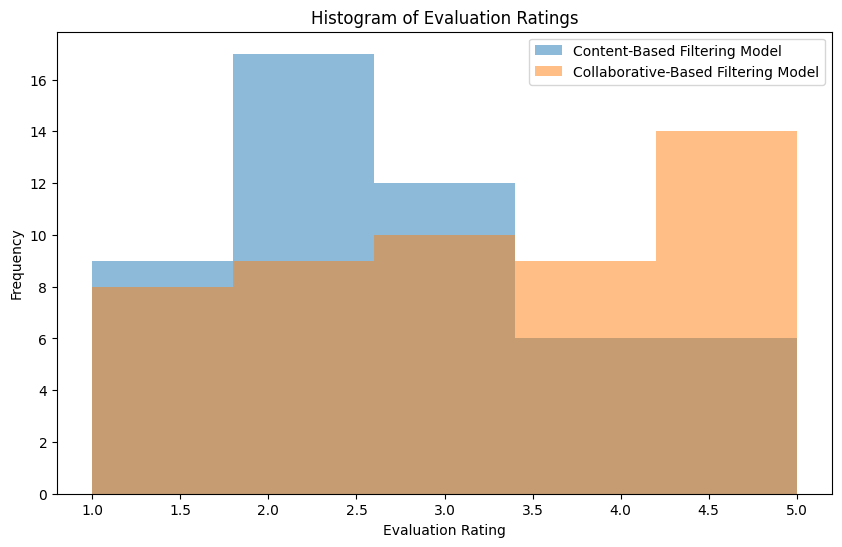

In [ ]:
import matplotlib.pyplot as plt

#Plot Historgram of EVulation Ratings
plt.figure(figsize=(10, 6))

plt.hist(content_based_results['evaluation_rating'], bins=5, alpha=0.5, label='Content-Based Filtering Model')
plt.hist(user_collaborative_results['evaluation_rating'], bins=5, alpha=0.5, label='Collaborative User-Based Filtering Model')

plt.xlabel('Evaluation Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Evaluation Ratings')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Generate summary statistics
content_based_stats = content_based_results['evaluation_rating'].describe()
user_collaborative_stats = user_collaborative_results['evaluation_rating'].describe()

# Calculate median and mode
content_based_median = content_based_results['evaluation_rating'].median()
user_collaborative_median = user_collaborative_results['evaluation_rating'].median()

content_based_mode = content_based_results['evaluation_rating'].mode().tolist()
user_collaborative_mode = user_collaborative_results['evaluation_rating'].mode().tolist()

# Combine the results into a DataFrame
comparison_df = pd.DataFrame({
    'Content-Based Filtering': content_based_stats,
    'Collaborative User-Based Filtering': user_collaborative_stats
})

# Add median and mode to the DataFrame
comparison_df.loc['median'] = [content_based_median, user_collaborative_median]
comparison_df.loc['mode'] = [', '.join(map(str, content_based_mode)), ', '.join(map(str, user_collaborative_mode))]

# Transpose for better readability
comparison_df = comparison_df.T
comparison_df

,count,mean,std,min,25%,50%,75%,max,median,mode
Content-Based Filtering,50.0,2.66,1.255356,1.0,2.0,2.0,3.0,5.0,2.0,2.0
Collaborative-Based Filtering,50.0,3.24,1.450686,1.0,2.0,3.0,5.0,5.0,3.0,5.0


## **Analysis of Results and Evaluation of Model:**

**What are the results of the evaluation? What did you find?**
The evaluation revealed distinct differences in the effectiveness of the two job recommendation models based on user ratings. For the content-based filtering model, the average rating was 2.66 and the median and mode rating were both 2.0. This relatively lower rating suggests that users found the recommendations less satisfactory or less aligned with their preferences compared to the user-based filtering model. On the other hand, the user-based filtering model received a higher average rating of 3.24 with a median rating of 3.0 and a mode rating of 5.0. This indicates that users perceived the recommendations generated by this model to be better aligned with their preferences and overall more relevant. The higher average rating for this model reflects better user satisfaction and a closer fit to user preferences.
The results of this evaluation are not especially surprising. Since most of the respondents are graduates in fields related to economics and finance, the user-based model is projected to have greater results since it leverages preferences from similar users to provide more relevant recommendations. Moreover, the results align with the principle of social proof, where users value recommendations that are popular among similar individuals (Roy, 2021). The higher ratings reflect that users may find recommendations more trustworthy and appealing when they are validated by their peers.



## VII. Conclusion, Recommendations & Other learnings

### **Learnings and Recommendations for Future Modeling:**
Based on the learnigs from modeling and the results of the recommendation system:

1. Include job descriptions or more specific job characteristics from the job requirements and job descriptions portion as part of the dataset and the item-profile matrix. This approach may enhance the accuracy of the recommendation system compared to using only general characteristics, as it aligns recommendations more closely with the initial jobs chosen by users. More specific characteristics can provide better recommendations because, as shown in the results of both models, there were duplicates. These duplicates may have arisen due to the use of overly general characteristics, where many job listings share the same general attributes (e.g., "College Graduate" or "Full Time"). Consequently, the similarities between different users' profiles were higher, leading to less personalized recommendations.

2. While using general features for job listings is convenient, incorporating more specific characteristics may yield better recommendations. The broad features we employed may have resulted in recommendations that were not well-tailored to the users, leading to lower average ratings for the suggested jobs in both models. By including detailed attributes such as specific job responsibilities, required skills, and industry-specific qualifications, the recommendation system can generate more relevant matches. This enhancement could address the issue of less fitting recommendations and improve user satisfaction by providing suggestions that align more closely with their preferences and job search criteria.

3. Collect more data for the user dataset with more diverse users to avoid the problem of having no similar users when running user-based collaborative filtering.


### **Overall Recommendations:**
To enhance the personalized career recommender system, it can be considered to integrate additional user data such as age, gender, personality traits, and career goals. This can enrich the context for both content-based and collaborative user-based filtering models. Collecting and analyzing implicit feedback, like click-through rates, job application rates, and time spent on job descriptions, can provide nuanced insights into user preferences beyond explicit ratings. It is also recommended to ensure the training data includes a wide range of job types and industries to avoid biases and provide comprehensive recommendations. Moving forward, developing features that suggest career progression paths, such as recommending mid-level positions to users who rate entry-level jobs highly, may be beneficial. Focusing on the skills required for each job and matching them with users' current skills and learning aspirations can help users find roles that align with or build upon their existing skill set. Performing sentiment analysis on job descriptions and user feedback can further refine the recommendation algorithms by identifying positive or negative sentiments. Finally, enhancing the transparency of your recommendation system may be done by providing explanations for why certain jobs were recommended, which builds trust and helps users understand how their data is being used.


### **Other Learnings:**
As we completed our final project, there were 4 key learnings that we were able to experience. First, we understood the value and importance of applying data scraping and data science to develop statistical and systematic recommendations/solutions for real world problems. The project especially has a sense of being relevant and personal for us since it began with observing the primary problems that our group ourselves faced in entering the labor market in the Philippines and the struggles for us to be able to apply and identify jobs that are fit to our tastes and preferences. We attempt to solve this problem specifically for inefficient local job search platforms like PhilJobNet compared to more advanced platforms such as Jobstreet and LinkedIn, since they currently lack the features for a logical recommendation model. Second, we realize the difficulty and time consuming nature of data collection and data cleaning. The data collection process was complex due to the dynamic nature of the PhilJobNet website, which required advanced web scraping techniques. Nevertheless, we were able to use Selenium for browser automation and Beautiful Soup for data extraction, which was a hands-on experience in overcoming practical challenges in data collection from dynamic web pages, and developed our skill in creating more flexible and adaptable data scraping methods. Third, our knowledge on modeling techniques was enriched through our practical experience in implementing both content-based filtering and collaborative user-based filtering, which provided a comprehensive understanding of the strengths and limitations of different recommendation system approaches. Lastly, we learned to evaluate the models. Initially, we had a difficult time developing a logical metric to evaluate the effectiveness of the model but then we settled with asking the users for their rating and feedback on the recommendations. However, to this, it was essential to recognize the biases and assumptions inherent in each model, since the answers do not provide a concrete basis of feedback since only 1 recommendation was given and the respondents are primarily focused on college degree holders on economics and finance. Nevertheless, our experience and journey in working together as they worked on the final project was fulfilling. It allowed us to apply theoretical knowledge to practical scenarios, benefiting not only a company like PhilJobNet but also aiding us as we undergraduates who are currently preparing to enter the job market in the future.



## VIII. References
Dhameliya, J., & Desai, N. (2019). Job recommendation system using content and collaborative filtering based techniques. Int J Soft Comput Eng, 9(3), 8-15.

Isinkaye, F. O., Folajimi, Y. O., & Ojokoh, B. A. (2015). Recommendation systems: Principles, methods and evaluation. Egyptian Informatics Journal, 16(3), 261–273. doi:10.1016/j.eij.2015.06.005

Roy, S. (2021). Theory of social proof and legal compliance: A socio-cognitive explanation for regulatory (non) compliance. German Law Journal, 22, 238–255. https://doi.org/10.1017/glj.2021.5

Zhang, Y., Yang, C., & Niu, Z. (2014, December). A research of job recommendation system based on collaborative filtering. In 2014 seventh international symposium on computational intelligence and design (Vol. 1, pp. 533-538). IEEE.

Bureau of Local Employment (n.d.) Job vacancies https://philjobnet.gov.ph/job-vacancies/

Han et al. (2012) Getting to Know Your Data: Cosine Similarity https://www.sciencedirect.com/topics/computer-science/cosine-similarity

Ravihara (2023) How to Use sklearn’s MultiLabelBinarizer for Data Preprocessing https://ransakaravihara.medium.com/efficient-data-preprocessing-with-sklearns-multilabelbinarizer-467df389e750

Berman (2016) Pearson Correlation https://www.sciencedirect.com/topics/computer-science/pearson-correlation
